In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install --upgrade scikit-learn

!apt-get -qq install -y graphviz && pip install pydot
import pydot


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, roc_auc_score


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import itertools

In [ ]:

df = pd.read_csv('/content/drive/MyDrive/cut_analysis.csv')
df

,tour,year,season,event_name,event_id,player_name,dg_id,fin_text,round_num,course_name,...,scrambling,prox_rgh,prox_fw,finish_category,CUT?,cut_binary,top_5_binary,top_20_binary,made_cut_binary,winner_binary
0,pga,2018,2018,SENTRY TOURNAMENT OF CHAMPIONS,16,"Johnson, Dustin",12422,1,1,PLANTATION COURSE AT KAPALUA,...,0.636,37.670,42.914,winner,made cut,1,0,0,1,1
1,pga,2018,2018,SENTRY TOURNAMENT OF CHAMPIONS,16,"Johnson, Dustin",12422,1,2,PLANTATION COURSE AT KAPALUA,...,0.667,29.627,44.661,winner,made cut,1,0,0,1,1
2,pga,2018,2018,SENTRY TOURNAMENT OF CHAMPIONS,16,"Johnson, Dustin",12422,1,3,PLANTATION COURSE AT KAPALUA,...,0.600,23.679,34.623,winner,made cut,1,0,0,1,1
3,pga,2018,2018,SENTRY TOURNAMENT OF CHAMPIONS,16,"Johnson, Dustin",12422,1,4,PLANTATION COURSE AT KAPALUA,...,0.857,36.246,46.068,winner,made cut,1,0,0,1,1
4,pga,2018,2018,SENTRY TOURNAMENT OF CHAMPIONS,16,"Rahm, Jon",19195,2,1,PLANTATION COURSE AT KAPALUA,...,0.636,38.424,36.003,top 5,made cut,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88847,pga,2022,2023,THE RSM CLASSIC,493,"Goya, Tano",10877,CUT,2,SEA ISLAND GOLF CLUB (PLANTATION),...,0.625,42.721,31.320,missed cut,missed cut,0,0,0,0,0
88848,pga,2022,2023,THE RSM CLASSIC,493,"Werenski, Richy",19364,CUT,1,SEA ISLAND GOLF CLUB (SEASIDE),...,0.375,71.091,32.874,missed cut,missed cut,0,0,0,0,0
88849,pga,2022,2023,THE RSM CLASSIC,493,"Werenski, Richy",19364,CUT,2,SEA ISLAND GOLF CLUB (PLANTATION),...,0.625,42.721,31.320,missed cut,missed cut,0,0,0,0,0
88850,pga,2022,2023,THE RSM CLASSIC,493,"Nimmer, Bryson",26013,CUT,1,SEA ISLAND GOLF CLUB (SEASIDE),...,0.250,33.532,44.120,missed cut,missed cut,0,0,0,0,0


In [ ]:
df.dtypes


tour                object
year                 int64
season               int64
event_name          object
event_id             int64
player_name         object
dg_id                int64
fin_text            object
round_num            int64
course_name         object
course_num           int64
course_par           int64
round_score          int64
sg_putt            float64
sg_arg             float64
sg_app             float64
sg_ott             float64
sg_t2g             float64
sg_total           float64
driving_dist       float64
driving_acc        float64
gir                float64
scrambling         float64
prox_rgh           float64
prox_fw            float64
finish_category     object
CUT?                object
cut_binary           int64
top_5_binary         int64
top_20_binary        int64
made_cut_binary      int64
winner_binary        int64
dtype: object

In [ ]:
df.shape

(88852, 32)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88852 entries, 0 to 88851
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tour             88852 non-null  object 
 1   year             88852 non-null  int64  
 2   season           88852 non-null  int64  
 3   event_name       88852 non-null  object 
 4   event_id         88852 non-null  int64  
 5   player_name      88852 non-null  object 
 6   dg_id            88852 non-null  int64  
 7   fin_text         88852 non-null  object 
 8   round_num        88852 non-null  int64  
 9   course_name      88852 non-null  object 
 10  course_num       88852 non-null  int64  
 11  course_par       88852 non-null  int64  
 12  round_score      88852 non-null  int64  
 13  sg_putt          88852 non-null  float64
 14  sg_arg           88852 non-null  float64
 15  sg_app           88852 non-null  float64
 16  sg_ott           88852 non-null  float64
 17  sg_t2g      

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['finish_category'] = le.fit_transform(df['finish_category'])


In [ ]:

counts = df['finish_category'].value_counts()
print(counts)

0    42509
1    26442
2    14555
3     4465
4      881
Name: finish_category, dtype: int64


In [ ]:

substrings = ['MDF', 'WD', 'CUT', 'W/D', 'DQ']
count = df['fin_text'].str.contains('|'.join(substrings)).sum()

print(f"Number of rows containing substrings {substrings}: {count}")

Number of rows containing substrings ['MDF', 'WD', 'CUT', 'W/D', 'DQ']: 26442


In [ ]:
# count the number of rows containing specific substrings
substrings = ['made cut']
count = df['CUT?'].str.contains('|'.join(substrings)).sum()

print(f"Number of rows containing substrings {substrings}: {count}")

Number of rows containing substrings ['made cut']: 62410


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88852 entries, 0 to 88851
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tour             88852 non-null  object 
 1   year             88852 non-null  int64  
 2   season           88852 non-null  int64  
 3   event_name       88852 non-null  object 
 4   event_id         88852 non-null  int64  
 5   player_name      88852 non-null  object 
 6   dg_id            88852 non-null  int64  
 7   fin_text         88852 non-null  object 
 8   round_num        88852 non-null  int64  
 9   course_name      88852 non-null  object 
 10  course_num       88852 non-null  int64  
 11  course_par       88852 non-null  int64  
 12  round_score      88852 non-null  int64  
 13  sg_putt          88852 non-null  float64
 14  sg_arg           88852 non-null  float64
 15  sg_app           88852 non-null  float64
 16  sg_ott           88852 non-null  float64
 17  sg_t2g      

In [ ]:

df = df.drop(['season', 'course_num', 'course_par','event_id','tour', 'year','player_name', 'event_name','fin_text','course_name','CUT?'], axis = 1)
df.head()
     

,dg_id,round_num,round_score,sg_putt,sg_arg,sg_app,sg_ott,sg_t2g,sg_total,driving_dist,...,gir,scrambling,prox_rgh,prox_fw,finish_category,cut_binary,top_5_binary,top_20_binary,made_cut_binary,winner_binary
0,12422,1,69,0.641,1.485,-0.610,1.394,2.270,2.912,323.8,...,0.778,0.636,37.670,42.914,4,1,0,0,1,1
1,12422,2,68,1.096,0.746,-0.062,1.190,1.875,2.971,324.4,...,0.722,0.667,29.627,44.661,4,1,0,0,1,1
2,12422,3,66,-0.384,0.079,3.488,2.228,5.797,5.412,325.5,...,0.889,0.600,23.679,34.623,4,1,0,0,1,1
3,12422,4,65,1.540,-0.007,-0.034,4.088,4.047,5.588,324.9,...,0.833,0.857,36.246,46.068,4,1,0,0,1,1
4,19195,1,71,-0.094,0.970,-1.036,1.071,1.006,0.912,317.0,...,0.611,0.636,38.424,36.003,3,1,1,0,1,0


In [ ]:
df.winner_binary.value_counts()

0    87971
1      881
Name: winner_binary, dtype: int64

In [ ]:
df.top_5_binary.value_counts()

0    84387
1     4465
Name: top_5_binary, dtype: int64

In [ ]:
df.top_20_binary.value_counts()

0    74297
1    14555
Name: top_20_binary, dtype: int64

In [ ]:
df.made_cut_binary.value_counts()

1    62410
0    26442
Name: made_cut_binary, dtype: int64

In [ ]:
df.columns

Index(['dg_id', 'round_num', 'round_score', 'sg_putt', 'sg_arg', 'sg_app',
       'sg_ott', 'sg_t2g', 'sg_total', 'driving_dist', 'driving_acc', 'gir',
       'scrambling', 'prox_rgh', 'prox_fw', 'finish_category', 'cut_binary',
       'top_5_binary', 'top_20_binary', 'made_cut_binary', 'winner_binary'],
      dtype='object')

In [ ]:
df.describe()

,dg_id,round_num,round_score,sg_putt,sg_arg,sg_app,sg_ott,sg_t2g,sg_total,driving_dist,...,gir,scrambling,prox_rgh,prox_fw,finish_category,cut_binary,top_5_binary,top_20_binary,made_cut_binary,winner_binary
count,8.885200e+04,88852.000000,88852.000000,88852.000000,88852.000000,88852.000000,88852.000000,88852.000000,88852.000000,88852.000000,...,88852.000000,88852.000000,88852.000000,88852.000000,88852.000000,88852.000000,88852.000000,88852.000000,88852.000000,88852.000000
mean,1.344899e+04,2.212499,70.718262,0.004426,0.002115,0.007431,0.010609,0.017279,0.013893,288.178665,...,0.681845,0.621185,43.758274,31.877531,0.815637,0.702404,0.050252,0.163812,0.702404,0.009915
std,4.771317e+04,1.075389,3.288296,1.655326,1.068506,1.601960,1.055062,2.266500,2.904519,12.420624,...,0.124437,0.182933,15.621561,6.621156,0.947894,0.457203,0.218466,0.370107,0.457203,0.099082
min,2.400000e+01,1.000000,59.000000,-8.884000,-8.120000,-10.213000,-9.995000,-18.297000,-17.328000,217.800000,...,0.056000,0.000000,0.000000,10.691000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.479000e+03,1.000000,68.000000,-1.043000,-0.604000,-0.957250,-0.524000,-1.307000,-1.804000,280.000000,...,0.611000,0.500000,34.213000,27.422000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.336700e+04,2.000000,71.000000,0.008000,0.016000,0.049000,0.136000,0.150000,0.163000,287.800000,...,0.667000,0.625000,42.721000,31.320000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,1.671500e+04,3.000000,73.000000,1.067250,0.635000,1.037250,0.705000,1.507000,1.994000,295.900000,...,0.778000,0.750000,51.693250,35.654000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000669e+07,4.000000,88.000000,7.321000,5.920000,6.714000,4.113000,8.982000,10.994000,417.100000,...,1.000000,1.000000,288.809000,84.407000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Define the columns to be scaled
cols_to_scale = ['finish_category', 'round_score','sg_putt', 'sg_arg', 'sg_app', 'sg_ott',
                  'driving_dist', 'driving_acc', 'gir',
                 'scrambling', 'prox_rgh', 'prox_fw']
df[cols_to_scale].describe()

,finish_category,round_score,sg_putt,sg_arg,sg_app,sg_ott,driving_dist,driving_acc,gir,scrambling,prox_rgh,prox_fw
count,88852.000000,88852.000000,88852.000000,88852.000000,88852.000000,88852.000000,88852.000000,88852.000000,88852.000000,88852.000000,88852.000000,88852.000000
mean,0.815637,70.718262,0.004426,0.002115,0.007431,0.010609,288.178665,0.654214,0.681845,0.621185,43.758274,31.877531
std,0.947894,3.288296,1.655326,1.068506,1.601960,1.055062,12.420624,0.146761,0.124437,0.182933,15.621561,6.621156
min,0.000000,59.000000,-8.884000,-8.120000,-10.213000,-9.995000,217.800000,0.071000,0.056000,0.000000,0.000000,10.691000
25%,0.000000,68.000000,-1.043000,-0.604000,-0.957250,-0.524000,280.000000,0.571000,0.611000,0.500000,34.213000,27.422000
50%,1.000000,71.000000,0.008000,0.016000,0.049000,0.136000,287.800000,0.643000,0.667000,0.625000,42.721000,31.320000
75%,1.000000,73.000000,1.067250,0.635000,1.037250,0.705000,295.900000,0.786000,0.778000,0.750000,51.693250,35.654000
max,4.000000,88.000000,7.321000,5.920000,6.714000,4.113000,417.100000,1.000000,1.000000,1.000000,288.809000,84.407000


In [ ]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Scale the selected columns
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])


In [ ]:
df

,dg_id,round_num,round_score,sg_putt,sg_arg,sg_app,sg_ott,sg_t2g,sg_total,driving_dist,...,gir,scrambling,prox_rgh,prox_fw,finish_category,cut_binary,top_5_binary,top_20_binary,made_cut_binary,winner_binary
0,12422,1,-0.522542,0.384563,1.387819,-0.385425,1.311201,2.270,2.912,2.867935,...,0.772725,0.080985,-0.389738,1.666859,3.359426,1,0,0,1,1
1,12422,2,-0.826652,0.659435,0.696196,-0.043342,1.117846,1.875,2.971,2.916242,...,0.322696,0.250448,-0.904606,1.930711,3.359426,1,0,0,1,1
2,12422,3,-1.434873,-0.234654,0.071956,2.172707,2.101680,5.797,5.412,3.004805,...,1.664746,-0.115810,-1.285364,0.414653,3.359426,1,0,0,1,1
3,12422,4,-1.738984,0.927662,-0.008530,-0.025863,3.864619,4.047,5.588,2.956497,...,1.214717,1.289088,-0.480894,2.143213,3.359426,1,0,0,1,1
4,19195,1,0.085680,-0.059461,0.905835,-0.651350,1.005056,1.006,0.912,2.320455,...,-0.569326,0.080985,-0.341471,0.623077,2.304450,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88847,10877,2,0.693901,0.002159,0.012995,0.025949,0.118847,0.150,-3.707,-0.030487,...,-0.119297,0.020853,-0.066401,-0.084205,0.194498,0,0,0,0,0
88848,19364,1,0.998011,-0.636994,-3.003383,0.517849,-0.146541,-2.514,-3.564,-0.763143,...,-0.119297,-1.345778,1.749689,0.150499,0.194498,0,0,0,0,0
88849,19364,2,1.302122,0.002159,0.012995,0.025949,0.118847,0.150,-5.707,-0.030487,...,-0.119297,0.020853,-0.066401,-0.084205,0.194498,0,0,0,0,0
88850,26013,1,0.693901,-0.371788,-1.083870,-0.041469,-0.709545,-1.953,-2.564,-1.721233,...,-0.119297,-2.029094,-0.654629,1.849003,0.194498,0,0,0,0,0


In [ ]:

#assigning our target variable and predictors
from sklearn.model_selection import train_test_split

X = df[[ 'round_score', 'sg_putt', 'sg_arg', 'sg_app', 'sg_ott',
                  'driving_dist', 'driving_acc', 'gir',
                 'scrambling', 'prox_rgh', 'prox_fw']]
y_win = df['winner_binary']
y_top5 = df['top_5_binary']
y_top20 = df['top_20_binary']
y_cut = df['made_cut_binary']


# Split the data into training and test sets, stratifying on the target variables
#Since the positive class is highly imbalanced, use larger test size  to ensure a sufficient number of positive instances in the test set. A test size of 30% and a random state of 42 
X_train, X_test, y_train_win, y_test_win = train_test_split(X, y_win, test_size=0.3, random_state=42, stratify=y_win)
X_train, X_test, y_train_top5, y_test_top5 = train_test_split(X, y_top5, test_size=0.3, random_state=42, stratify=y_top5)
X_train, X_test, y_train_top20, y_test_top20 = train_test_split(X, y_top20, test_size=0.3, random_state=42, stratify=y_top20)
X_train, X_test, y_train_cut, y_test_cut = train_test_split(X, y_cut, test_size=0.3, random_state=42, stratify=y_cut)

In [ ]:
X_train.shape

(62196, 11)

In [ ]:
y_train_win.shape

(62196,)

## Logistic regression

In [ ]:
#Define logistic regression model with increased max_iter
lr = LogisticRegression(random_state=42, max_iter=1000)

# Train and evaluate model for each target variable
targets = [('Winner Binary', y_train_win, y_test_win),
           ('Top 5 Binary', y_train_top5, y_test_top5),
           ('Top 20 Binary', y_train_top20, y_test_top20),
           ('Made Cut Binary', y_train_cut, y_test_cut)]

for name, y_train, y_test in targets:
    # Fit the model and make predictions
    lr.fit(X_train, y_train)
    y_pred_train = lr.predict(X_train)
    y_pred_test = lr.predict(X_test)

    # Print training and testing accuracy
    print(f"\n{name}:")
    print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
    print("Testing Accuracy:", accuracy_score(y_test, y_pred_test))

    # Print classification report
    log_pred = lr.predict(X_test)
    log_report = classification_report(y_test, log_pred, zero_division=0)
    print(log_report)



Winner Binary:
Training Accuracy: 0.9900797478937552
Testing Accuracy: 0.9900960384153662
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     26392
           1       0.00      0.00      0.00       264

    accuracy                           0.99     26656
   macro avg       0.50      0.50      0.50     26656
weighted avg       0.98      0.99      0.99     26656


Top 5 Binary:
Training Accuracy: 0.9497556112933307
Testing Accuracy: 0.9497298919567827
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     25316
           1       0.00      0.00      0.00      1340

    accuracy                           0.95     26656
   macro avg       0.47      0.50      0.49     26656
weighted avg       0.90      0.95      0.93     26656


Top 20 Binary:
Training Accuracy: 0.8361952537140652
Testing Accuracy: 0.836171968787515
              precision    recall  f1-score   support

           0       0

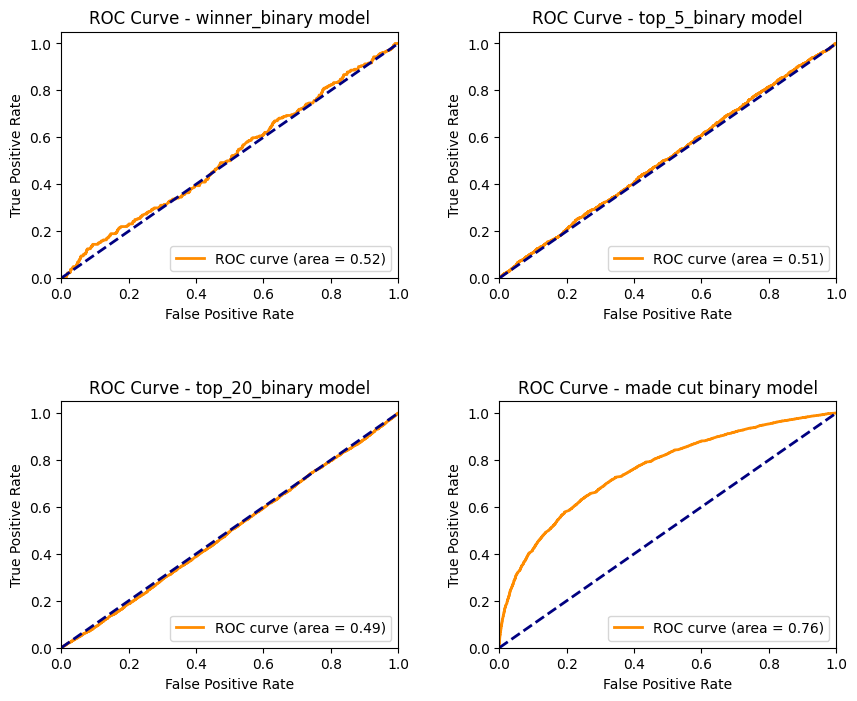

In [ ]:
#Create a visual with subplots

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
plt.subplots_adjust(wspace=0.3, hspace=0.5)

# Compute ROC curve and ROC area for winner_binary model
y_pred_proba = lr.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_win, y_pred_proba)
roc_auc = roc_auc_score(y_test_win, y_pred_proba)

#Plot ROC curve for winner_binary model
axs[0, 0].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axs[0, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[0, 0].set_xlim([0.0, 1.0])
axs[0, 0].set_ylim([0.0, 1.05])
axs[0, 0].set_xlabel('False Positive Rate')
axs[0, 0].set_ylabel('True Positive Rate')
axs[0, 0].set_title('ROC Curve - winner_binary model')
axs[0, 0].legend(loc="lower right")

#Compute ROC curve and ROC area for top_5_binary model
y_pred_proba = lr.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_top5, y_pred_proba)
roc_auc = roc_auc_score(y_test_top5, y_pred_proba)

#Plot ROC curve for top_5_binary model
axs[0, 1].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axs[0, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[0, 1].set_xlim([0.0, 1.0])
axs[0, 1].set_ylim([0.0, 1.05])
axs[0, 1].set_xlabel('False Positive Rate')
axs[0, 1].set_ylabel('True Positive Rate')
axs[0, 1].set_title('ROC Curve - top_5_binary model')
axs[0, 1].legend(loc="lower right")

#Compute ROC curve and ROC area for top_20_binary model
y_pred_proba = lr.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_top20, y_pred_proba)
roc_auc = roc_auc_score(y_test_top20, y_pred_proba)

#Plot ROC curve for top_20_binary model
axs[1, 0].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axs[1, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[1, 0].set_xlim([0.0, 1.0])
axs[1, 0].set_ylim([0.0, 1.05])
axs[1, 0].set_xlabel('False Positive Rate')
axs[1, 0].set_ylabel('True Positive Rate')
axs[1, 0].set_title('ROC Curve - top_20_binary model')
axs[1, 0].legend(loc="lower right")

#Compute ROC curve and ROC area for made_cut_binary model
y_pred_proba = lr.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_cut, y_pred_proba)
roc_auc = roc_auc_score(y_test_cut, y_pred_proba)

#Plot ROC curve for made_cut_binary model
axs[1, 1].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axs[1, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[1, 1].set_xlim([0.0, 1.0])
axs[1, 1].set_ylim([0.0, 1.05])
axs[1, 1].set_xlabel('False Positive Rate')
axs[1, 1].set_ylabel('True Positive Rate')
axs[1, 1].set_title('ROC Curve - made cut binary model')
axs[1, 1].legend(loc="lower right")


Text(0.5, 0, 'Predicted label')

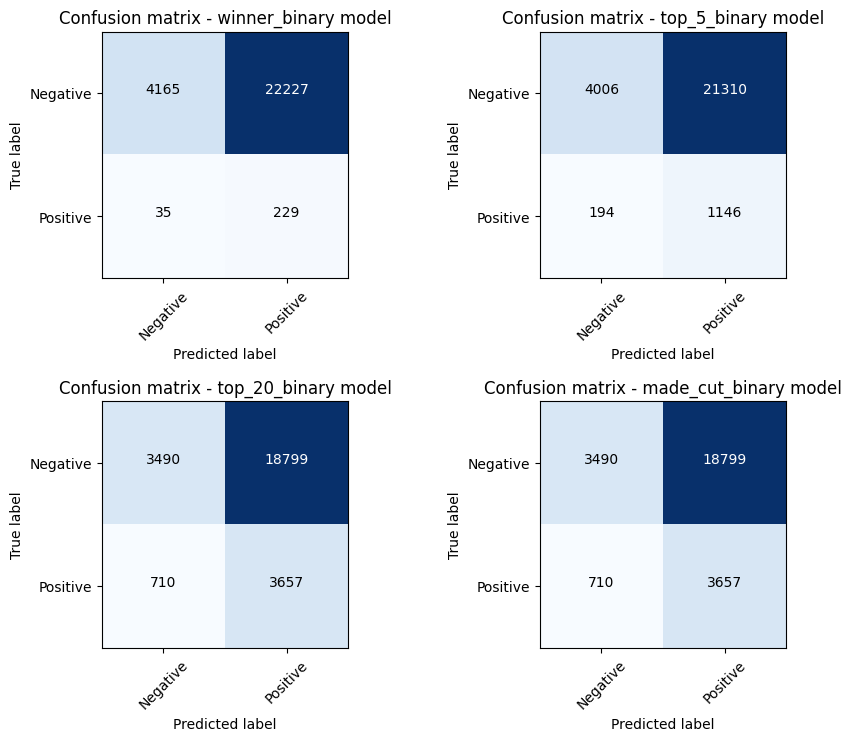

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools


fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
plt.subplots_adjust(wspace=0.3, hspace=0.5)

# Define class labels
classes = ['Negative', 'Positive']

# Compute confusion matrix for winner_binary model
y_pred = lr.predict(X_test)
cm = confusion_matrix(y_test_win, y_pred)
# Plot confusion matrix for winner_binary model
axs[0, 0].imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
axs[0, 0].set_title('Confusion matrix - winner_binary model')
tick_marks = np.arange(len(classes))
axs[0, 0].set_xticks(tick_marks)
axs[0, 0].set_xticklabels(classes, rotation=45)
axs[0, 0].set_yticks(tick_marks)
axs[0, 0].set_yticklabels(classes)
fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    axs[0, 0].text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
axs[0, 0].set_ylabel('True label')
axs[0, 0].set_xlabel('Predicted label')

# Compute confusion matrix for top_5_binary model
y_pred = lr.predict(X_test)
cm = confusion_matrix(y_test_top5, y_pred)
# Plot confusion matrix for top_5_binary model
axs[0, 1].imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
axs[0, 1].set_title('Confusion matrix - top_5_binary model')
tick_marks = np.arange(len(classes))
axs[0, 1].set_xticks(tick_marks)
axs[0, 1].set_xticklabels(classes, rotation=45)
axs[0, 1].set_yticks(tick_marks)
axs[0, 1].set_yticklabels(classes)
fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    axs[0, 1].text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
axs[0, 1].set_ylabel('True label')
axs[0, 1].set_xlabel('Predicted label')

# Compute confusion matrix for top_20_binary model
y_pred = lr.predict(X_test)
cm = confusion_matrix(y_test_top20, y_pred)
# Plot confusion matrix for top_20_binary model
axs[1, 0].imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
axs[1, 0].set_title('Confusion matrix - top_20_binary model')
tick_marks = np.arange(len(classes))
axs[1, 0].set_xticks(tick_marks)
axs[1, 0].set_xticklabels(classes, rotation=45)
axs[1, 0].set_yticks(tick_marks)
axs[1, 0].set_yticklabels(classes)
fmt = 'd'
thresh = cm.max() / 2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    axs[1, 0].text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
axs[1, 0].set_ylabel('True label')
axs[1, 0].set_xlabel('Predicted label')

# Compute confusion matrix for made_cut_binary model
y_pred = lr.predict(X_test)
cm = confusion_matrix(y_test_top20, y_pred)
# Plot confusion matrix for top_20_binary model
axs[1, 1].imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
axs[1, 1].set_title('Confusion matrix - made_cut_binary model')
tick_marks = np.arange(len(classes))
axs[1, 1].set_xticks(tick_marks)
axs[1, 1].set_xticklabels(classes, rotation=45)
axs[1, 1].set_yticks(tick_marks)
axs[1, 1].set_yticklabels(classes)
fmt = 'd'
thresh = cm.max() / 2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    axs[1, 1].text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
axs[1, 1].set_ylabel('True label')
axs[1, 1].set_xlabel('Predicted label')




# Naive Bayes 


In [ ]:
# create the model
nb = GaussianNB()

models = {
    'Winner Binary': (y_train_win, y_test_win),
    'Top 5 Binary': (y_train_top5, y_test_top5),
    'Top 20 Binary': (y_train_top20, y_test_top20),
    'Made Cut Binary': (y_train_cut, y_test_cut)
}

for name, (y_train, y_test) in models.items():
    
    nb.fit(X_train, y_train)

  
    y_pred_train = nb.predict(X_train)
    y_pred_test = nb.predict(X_test)

    # evaluate 
    print(name + ':')
    print('Training Accuracy:', accuracy_score(y_train, y_pred_train))
    print('Testing Accuracy:', accuracy_score(y_test, y_pred_test))

    # classification report for accuracy of predictions
    nb_pred = nb.predict(X_test)
    nb_report = classification_report(y_test, nb_pred, zero_division=0)
    print(nb_report)


Winner Binary:
Training Accuracy: 0.9900797478937552
Testing Accuracy: 0.9900960384153662
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     26392
           1       0.00      0.00      0.00       264

    accuracy                           0.99     26656
   macro avg       0.50      0.50      0.50     26656
weighted avg       0.98      0.99      0.99     26656

Top 5 Binary:
Training Accuracy: 0.9497556112933307
Testing Accuracy: 0.9497298919567827
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     25316
           1       0.00      0.00      0.00      1340

    accuracy                           0.95     26656
   macro avg       0.47      0.50      0.49     26656
weighted avg       0.90      0.95      0.93     26656

Top 20 Binary:
Training Accuracy: 0.8361952537140652
Testing Accuracy: 0.836171968787515
              precision    recall  f1-score   support

           0       0.84

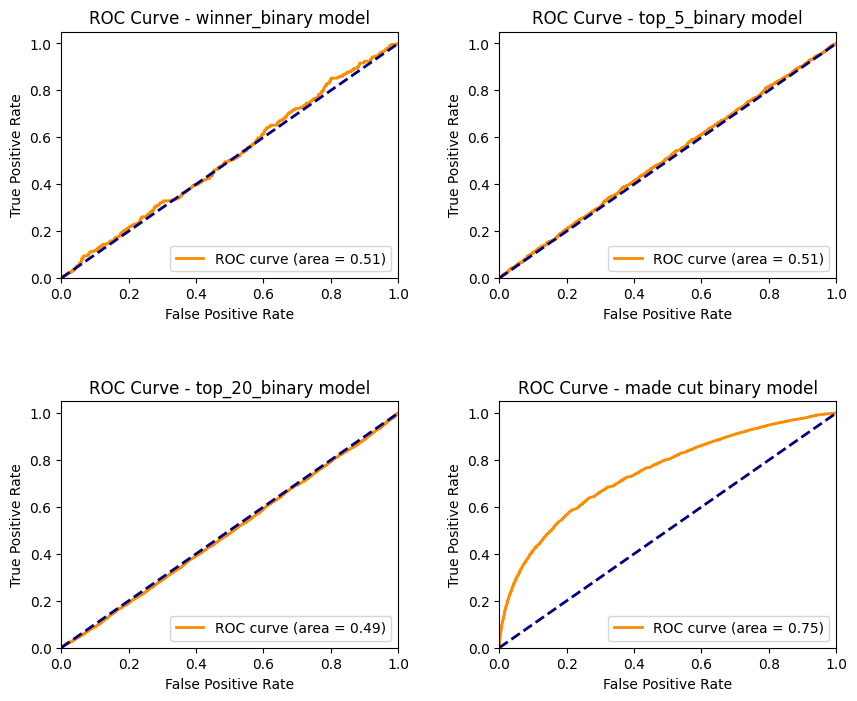

In [ ]:

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
plt.subplots_adjust(wspace=0.3, hspace=0.5)


y_pred_proba = nb.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_win, y_pred_proba)
roc_auc = roc_auc_score(y_test_win, y_pred_proba)

axs[0, 0].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axs[0, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[0, 0].set_xlim([0.0, 1.0])
axs[0, 0].set_ylim([0.0, 1.05])
axs[0, 0].set_xlabel('False Positive Rate')
axs[0, 0].set_ylabel('True Positive Rate')
axs[0, 0].set_title('ROC Curve - winner_binary model')
axs[0, 0].legend(loc="lower right")

y_pred_proba = nb.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_top5, y_pred_proba)
roc_auc = roc_auc_score(y_test_top5, y_pred_proba)

axs[0, 1].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axs[0, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[0, 1].set_xlim([0.0, 1.0])
axs[0, 1].set_ylim([0.0, 1.05])
axs[0, 1].set_xlabel('False Positive Rate')
axs[0, 1].set_ylabel('True Positive Rate')
axs[0, 1].set_title('ROC Curve - top_5_binary model')
axs[0, 1].legend(loc="lower right")


y_pred_proba = nb.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_top20, y_pred_proba)
roc_auc = roc_auc_score(y_test_top20, y_pred_proba)


axs[1, 0].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axs[1, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[1, 0].set_xlim([0.0, 1.0])
axs[1, 0].set_ylim([0.0, 1.05])
axs[1, 0].set_xlabel('False Positive Rate')
axs[1, 0].set_ylabel('True Positive Rate')
axs[1, 0].set_title('ROC Curve - top_20_binary model')
axs[1, 0].legend(loc="lower right")

y_pred_proba = nb.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_cut, y_pred_proba)
roc_auc = roc_auc_score(y_test_cut, y_pred_proba)

axs[1, 1].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axs[1, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[1, 1].set_xlim([0.0, 1.0])
axs[1, 1].set_ylim([0.0, 1.05])
axs[1, 1].set_xlabel('False Positive Rate')
axs[1, 1].set_ylabel('True Positive Rate')
axs[1, 1].set_title('ROC Curve - made cut binary model')
axs[1, 1].legend(loc="lower right")


Text(0.5, 0, 'Predicted label')

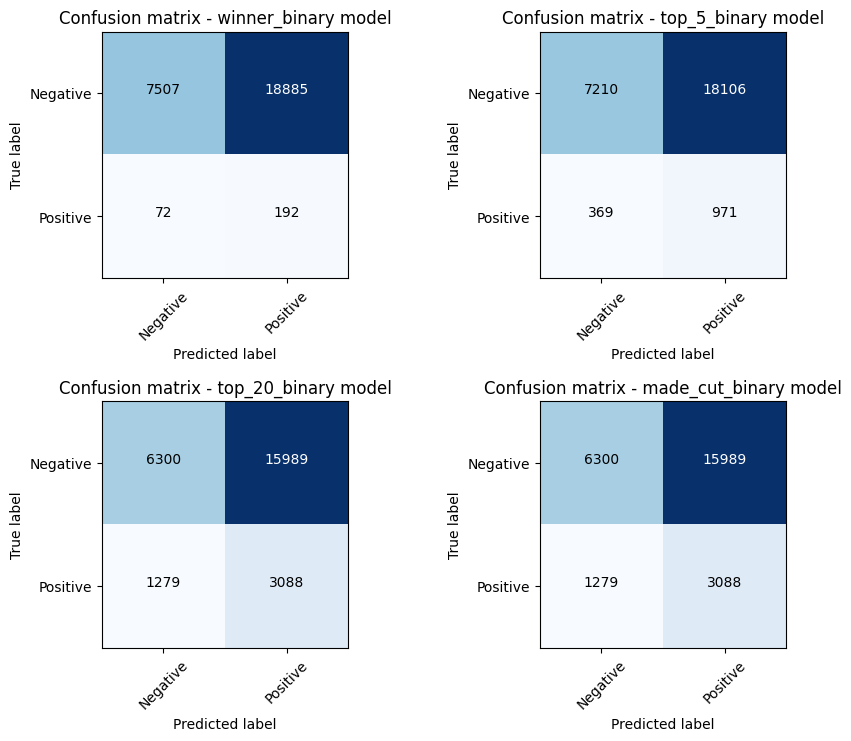

In [ ]:


fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
plt.subplots_adjust(wspace=0.3, hspace=0.5)


classes = ['Negative', 'Positive']

#Compute confusion matrix for winner_binary model
y_pred = nb.predict(X_test)
cm = confusion_matrix(y_test_win, y_pred)
#Plot confusion matrix for winner_binary model
axs[0, 0].imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
axs[0, 0].set_title('Confusion matrix - winner_binary model')
tick_marks = np.arange(len(classes))
axs[0, 0].set_xticks(tick_marks)
axs[0, 0].set_xticklabels(classes, rotation=45)
axs[0, 0].set_yticks(tick_marks)
axs[0, 0].set_yticklabels(classes)
fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    axs[0, 0].text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
axs[0, 0].set_ylabel('True label')
axs[0, 0].set_xlabel('Predicted label')

#Compute confusion matrix for top_5_binary model
y_pred = nb.predict(X_test)
cm = confusion_matrix(y_test_top5, y_pred)
#Plot confusion matrix for top_5_binary model
axs[0, 1].imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
axs[0, 1].set_title('Confusion matrix - top_5_binary model')
tick_marks = np.arange(len(classes))
axs[0, 1].set_xticks(tick_marks)
axs[0, 1].set_xticklabels(classes, rotation=45)
axs[0, 1].set_yticks(tick_marks)
axs[0, 1].set_yticklabels(classes)
fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    axs[0, 1].text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
axs[0, 1].set_ylabel('True label')
axs[0, 1].set_xlabel('Predicted label')

# Compute confusion matrix for top_20_binary model
y_pred = nb.predict(X_test)
cm = confusion_matrix(y_test_top20, y_pred)
# Plot confusion matrix for top_20_binary model
axs[1, 0].imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
axs[1, 0].set_title('Confusion matrix - top_20_binary model')
tick_marks = np.arange(len(classes))
axs[1, 0].set_xticks(tick_marks)
axs[1, 0].set_xticklabels(classes, rotation=45)
axs[1, 0].set_yticks(tick_marks)
axs[1, 0].set_yticklabels(classes)
fmt = 'd'
thresh = cm.max() / 2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    axs[1, 0].text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
axs[1, 0].set_ylabel('True label')
axs[1, 0].set_xlabel('Predicted label')

# Compute confusion matrix for made_cut_binary model
y_pred = nb.predict(X_test)
cm = confusion_matrix(y_test_top20, y_pred)
# Plot confusion matrix for top_20_binary model
axs[1, 1].imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
axs[1, 1].set_title('Confusion matrix - made_cut_binary model')
tick_marks = np.arange(len(classes))
axs[1, 1].set_xticks(tick_marks)
axs[1, 1].set_xticklabels(classes, rotation=45)
axs[1, 1].set_yticks(tick_marks)
axs[1, 1].set_yticklabels(classes)
fmt = 'd'
thresh = cm.max() / 2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    axs[1, 1].text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
axs[1, 1].set_ylabel('True label')
axs[1, 1].set_xlabel('Predicted label')




# Support Vector Machines (SVM):

In [ ]:


svm = SVC(kernel='rbf', probability=True, random_state=42)


# fit and evaluate the model for winner_binary
svm.fit(X_train, y_train_win)
y_pred_train = svm.predict(X_train)
y_pred_test = svm.predict(X_test)

print("Winner Binary:")
print("Training Accuracy:", accuracy_score(y_train_win, y_pred_train))
print("Testing Accuracy:", accuracy_score(y_test_win, y_pred_test))

# classification report for accuracy of predictions for winner 
svm_pred = svm.predict(X_test)
svm_report = classification_report(y_test_win, svm_pred, zero_division=1)
print(svm_report)

# fit and evaluate the model for top_5_binary
svm.fit(X_train, y_train_top5)
y_pred_train = svm.predict(X_train)
y_pred_test = svm.predict(X_test)

print("\nTop 5 Binary:")
print("Training Accuracy:", accuracy_score(y_train_top5, y_pred_train))
print("Testing Accuracy:", accuracy_score(y_test_top5, y_pred_test))

# classification report for accuracy of predictions for top 5 
svm_pred = svm.predict(X_test)
svm_report = classification_report(y_test_top5, svm_pred, zero_division=1)
print(svm_report)

# fit and evaluate the model for top_20_binary
svm.fit(X_train, y_train_top20)
y_pred_train = svm.predict(X_train)
y_pred_test = svm.predict(X_test)

print("\nTop 20 Binary:")
print("Training Accuracy:", accuracy_score(y_train_top20, y_pred_train))
print("Testing Accuracy:", accuracy_score(y_test_top20, y_pred_test))

# classification report for accuracy of predictions for top 20 
svm_pred = svm.predict(X_test)
svm_report = classification_report(y_test_top20, svm_pred, zero_division=1)
print(svm_report)

# fit and evaluate the model for made_cut_binary
svm.fit(X_train, y_train_cut)
y_pred_train = svm.predict(X_train)
y_pred_test = svm.predict(X_test)

print("\nMade Cut Binary:")
print("Training Accuracy:", accuracy_score(y_train_cut, y_pred_train))
print("Testing Accuracy:", accuracy_score(y_test_cut, y_pred_test))

# classification report for accuracy of predictions for cut
svm_pred = svm.predict(X_test)
svm_report = classification_report(y_test_cut, svm_pred,zero_division=1)
print(svm_report)


# Random Forest


In [ ]:
# define the model
rfc = RandomForestClassifier(n_estimators=100, class_weight='balanced', max_depth=10, min_samples_leaf=10, random_state=42)

# create a list of binary targets and corresponding dataset splits
targets = [('Winner Binary', y_train_win, y_test_win),           ('Top 5 Binary', y_train_top5, y_test_top5),           ('Top 20 Binary', y_train_top20, y_test_top20),           ('Made Cut Binary', y_train_cut, y_test_cut)]

# train and evaluate the model for each target
for target in targets:
    print(target[0])
    rfc.fit(X_train, target[1])
    y_pred_train = rfc.predict(X_train)
    y_pred_test = rfc.predict(X_test)
    print("Training Accuracy:", accuracy_score(target[1], y_pred_train))
    print("Testing Accuracy:", accuracy_score(target[2], y_pred_test))
    rfc_pred = rfc.predict(X_test)
    rfc_report = classification_report(target[2], rfc_pred, zero_division=1)
    print(rfc_report)
    print()


Winner Binary
Training Accuracy: 0.9814135957296289
Testing Accuracy: 0.9742271908763506
              precision    recall  f1-score   support

           0       0.99      0.98      0.99     26392
           1       0.01      0.02      0.01       264

    accuracy                           0.97     26656
   macro avg       0.50      0.50      0.50     26656
weighted avg       0.98      0.97      0.98     26656


Top 5 Binary
Training Accuracy: 0.8866647372821403
Testing Accuracy: 0.8500525210084033
              precision    recall  f1-score   support

           0       0.95      0.89      0.92     25316
           1       0.04      0.09      0.06      1340

    accuracy                           0.85     26656
   macro avg       0.50      0.49      0.49     26656
weighted avg       0.90      0.85      0.88     26656


Top 20 Binary
Training Accuracy: 0.7367997941989839
Testing Accuracy: 0.6396683673469388
              precision    recall  f1-score   support

           0       0.83

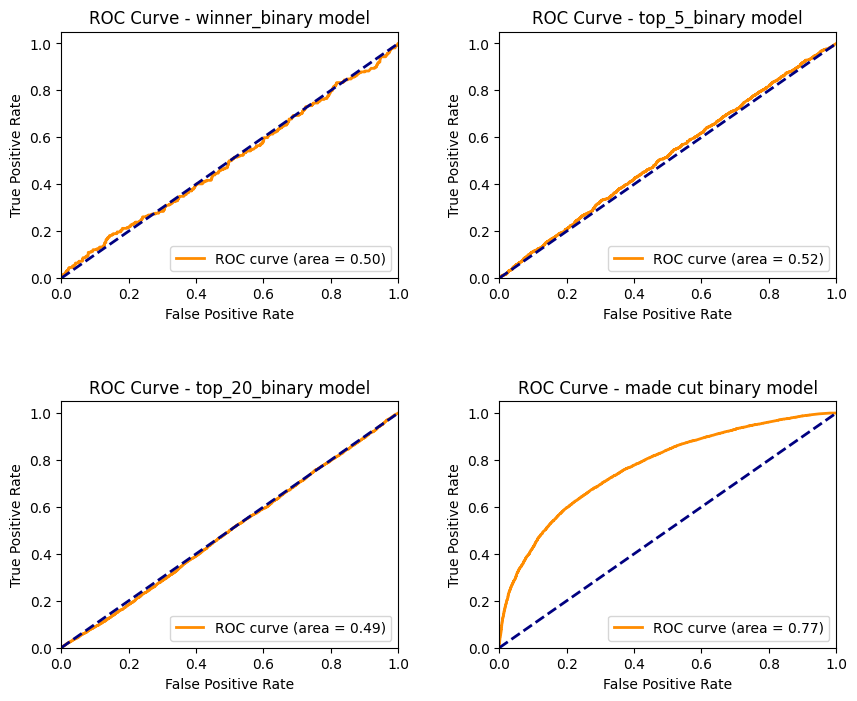

In [ ]:
# Create a figure with subplots

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
plt.subplots_adjust(wspace=0.3, hspace=0.5)

# Compute ROC curve and ROC area for winner_binary model
y_pred_proba = rfc.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_win, y_pred_proba)
roc_auc = roc_auc_score(y_test_win, y_pred_proba)

# Plot ROC curve for winner_binary model
axs[0, 0].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axs[0, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[0, 0].set_xlim([0.0, 1.0])
axs[0, 0].set_ylim([0.0, 1.05])
axs[0, 0].set_xlabel('False Positive Rate')
axs[0, 0].set_ylabel('True Positive Rate')
axs[0, 0].set_title('ROC Curve - winner_binary model')
axs[0, 0].legend(loc="lower right")

# Compute ROC curve and ROC area for top_5_binary model
y_pred_proba = rfc.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_top5, y_pred_proba)
roc_auc = roc_auc_score(y_test_top5, y_pred_proba)

# Plot ROC curve for top_5_binary model
axs[0, 1].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axs[0, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[0, 1].set_xlim([0.0, 1.0])
axs[0, 1].set_ylim([0.0, 1.05])
axs[0, 1].set_xlabel('False Positive Rate')
axs[0, 1].set_ylabel('True Positive Rate')
axs[0, 1].set_title('ROC Curve - top_5_binary model')
axs[0, 1].legend(loc="lower right")

# Compute ROC curve and ROC area for top_20_binary model
y_pred_proba = rfc.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_top20, y_pred_proba)
roc_auc = roc_auc_score(y_test_top20, y_pred_proba)

# Plot ROC curve for top_20_binary model
axs[1, 0].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axs[1, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[1, 0].set_xlim([0.0, 1.0])
axs[1, 0].set_ylim([0.0, 1.05])
axs[1, 0].set_xlabel('False Positive Rate')
axs[1, 0].set_ylabel('True Positive Rate')
axs[1, 0].set_title('ROC Curve - top_20_binary model')
axs[1, 0].legend(loc="lower right")

# Compute ROC curve and ROC area for made_cut_binary model
y_pred_proba = rfc.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_cut, y_pred_proba)
roc_auc = roc_auc_score(y_test_cut, y_pred_proba)

# Plot ROC curve for made_cut_binary model
axs[1, 1].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axs[1, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[1, 1].set_xlim([0.0, 1.0])
axs[1, 1].set_ylim([0.0, 1.05])
axs[1, 1].set_xlabel('False Positive Rate')
axs[1, 1].set_ylabel('True Positive Rate')
axs[1, 1].set_title('ROC Curve - made cut binary model')
axs[1, 1].legend(loc="lower right")


Text(0.5, 0, 'Predicted label')

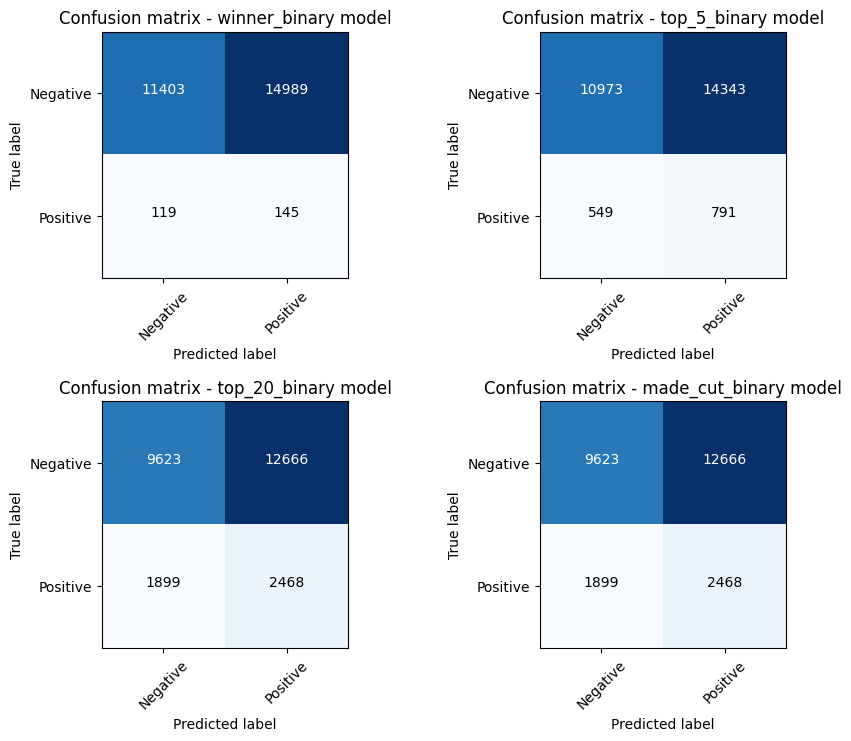

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

# Create a figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
plt.subplots_adjust(wspace=0.3, hspace=0.5)

# Define class labels
classes = ['Negative', 'Positive']

# Compute confusion matrix for winner_binary model
y_pred = rfc.predict(X_test)
cm = confusion_matrix(y_test_win, y_pred)
# Plot confusion matrix for winner_binary model
axs[0, 0].imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
axs[0, 0].set_title('Confusion matrix - winner_binary model')
tick_marks = np.arange(len(classes))
axs[0, 0].set_xticks(tick_marks)
axs[0, 0].set_xticklabels(classes, rotation=45)
axs[0, 0].set_yticks(tick_marks)
axs[0, 0].set_yticklabels(classes)
fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    axs[0, 0].text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
axs[0, 0].set_ylabel('True label')
axs[0, 0].set_xlabel('Predicted label')

# Compute confusion matrix for top_5_binary model
y_pred = rfc.predict(X_test)
cm = confusion_matrix(y_test_top5, y_pred)
# Plot confusion matrix for top_5_binary model
axs[0, 1].imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
axs[0, 1].set_title('Confusion matrix - top_5_binary model')
tick_marks = np.arange(len(classes))
axs[0, 1].set_xticks(tick_marks)
axs[0, 1].set_xticklabels(classes, rotation=45)
axs[0, 1].set_yticks(tick_marks)
axs[0, 1].set_yticklabels(classes)
fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    axs[0, 1].text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
axs[0, 1].set_ylabel('True label')
axs[0, 1].set_xlabel('Predicted label')

# Compute confusion matrix for top_20_binary model
y_pred = rfc.predict(X_test)
cm = confusion_matrix(y_test_top20, y_pred)
# Plot confusion matrix for top_20_binary model
axs[1, 0].imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
axs[1, 0].set_title('Confusion matrix - top_20_binary model')
tick_marks = np.arange(len(classes))
axs[1, 0].set_xticks(tick_marks)
axs[1, 0].set_xticklabels(classes, rotation=45)
axs[1, 0].set_yticks(tick_marks)
axs[1, 0].set_yticklabels(classes)
fmt = 'd'
thresh = cm.max() / 2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    axs[1, 0].text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
axs[1, 0].set_ylabel('True label')
axs[1, 0].set_xlabel('Predicted label')

# Compute confusion matrix for made_cut_binary model
y_pred = rfc.predict(X_test)
cm = confusion_matrix(y_test_top20, y_pred)
# Plot confusion matrix for top_20_binary model
axs[1, 1].imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
axs[1, 1].set_title('Confusion matrix - made_cut_binary model')
tick_marks = np.arange(len(classes))
axs[1, 1].set_xticks(tick_marks)
axs[1, 1].set_xticklabels(classes, rotation=45)
axs[1, 1].set_yticks(tick_marks)
axs[1, 1].set_yticklabels(classes)
fmt = 'd'
thresh = cm.max() / 2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    axs[1, 1].text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
axs[1, 1].set_ylabel('True label')
axs[1, 1].set_xlabel('Predicted label')




# Gradient Boosting Classifier:



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=10, random_state=42)

metrics = {'Winner Binary': (y_train_win, y_test_win), 'Top 5 Binary': (y_train_top5, y_test_top5), 'Top 20 Binary': (y_train_top20, y_test_top20), 'Made Cut Binary': (y_train_cut, y_test_cut)}

for metric, (y_train, y_test) in metrics.items():
    gbc.fit(X_train, y_train)
    y_pred_train = gbc.predict(X_train)
    y_pred_test = gbc.predict(X_test)

    print(metric + ':')
    print('Training Accuracy:', accuracy_score(y_train, y_pred_train))
    print('Testing Accuracy:', accuracy_score(y_test, y_pred_test))

    gbc_pred = gbc.predict(X_test)
    gbc_report = classification_report(y_test, gbc_pred, zero_division=1)
    print(gbc_report)


Winner Binary:
Training Accuracy: 0.999646279503505
Testing Accuracy: 0.9818427370948379
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     26392
           1       0.02      0.02      0.02       264

    accuracy                           0.98     26656
   macro avg       0.50      0.50      0.50     26656
weighted avg       0.98      0.98      0.98     26656

Top 5 Binary:
Training Accuracy: 0.9626664094153965
Testing Accuracy: 0.9482292917166867
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     25316
           1       0.02      0.00      0.00      1340

    accuracy                           0.95     26656
   macro avg       0.49      0.50      0.49     26656
weighted avg       0.90      0.95      0.92     26656

Top 20 Binary:
Training Accuracy: 0.8548459708019809
Testing Accuracy: 0.8339960984393757
              precision    recall  f1-score   support

           0       0.84

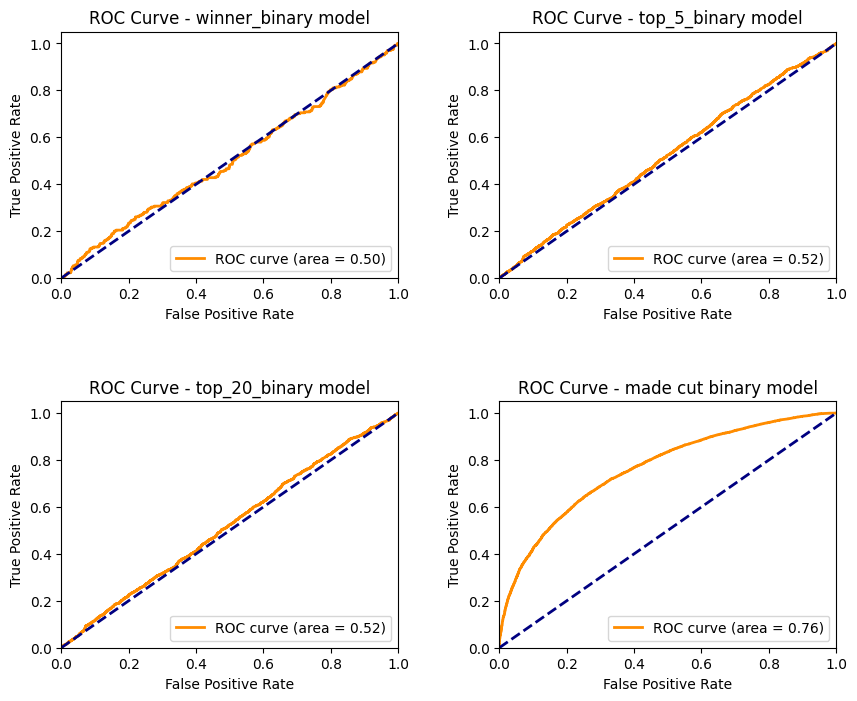

In [ ]:
# Create a figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
plt.subplots_adjust(wspace=0.3, hspace=0.5)

# Compute ROC curve and ROC area for winner_binary model
y_pred_proba = gbc.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_win, y_pred_proba)
roc_auc = roc_auc_score(y_test_win, y_pred_proba)

# Plot ROC curve for winner_binary model
axs[0, 0].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axs[0, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[0, 0].set_xlim([0.0, 1.0])
axs[0, 0].set_ylim([0.0, 1.05])
axs[0, 0].set_xlabel('False Positive Rate')
axs[0, 0].set_ylabel('True Positive Rate')
axs[0, 0].set_title('ROC Curve - winner_binary model')
axs[0, 0].legend(loc="lower right")

# Compute ROC curve and ROC area for top_5_binary model
y_pred_proba = gbc.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_top5, y_pred_proba)
roc_auc = roc_auc_score(y_test_top5, y_pred_proba)

# Plot ROC curve for top_5_binary model
axs[0, 1].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axs[0, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[0, 1].set_xlim([0.0, 1.0])
axs[0, 1].set_ylim([0.0, 1.05])
axs[0, 1].set_xlabel('False Positive Rate')
axs[0, 1].set_ylabel('True Positive Rate')
axs[0, 1].set_title('ROC Curve - top_5_binary model')
axs[0, 1].legend(loc="lower right")

# Plot ROC curve for top_20_binary model
axs[1, 0].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axs[1, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[1, 0].set_xlim([0.0, 1.0])
axs[1, 0].set_ylim([0.0, 1.05])
axs[1, 0].set_xlabel('False Positive Rate')
axs[1, 0].set_ylabel('True Positive Rate')
axs[1, 0].set_title('ROC Curve - top_20_binary model')
axs[1, 0].legend(loc="lower right")

# Compute ROC curve and ROC area for made_cut_binary model
y_pred_proba = gbc.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_cut, y_pred_proba)
roc_auc = roc_auc_score(y_test_cut, y_pred_proba)

# Plot ROC curve for made_cut_binary model
axs[1, 1].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axs[1, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[1, 1].set_xlim([0.0, 1.0])
axs[1, 1].set_ylim([0.0, 1.05])
axs[1, 1].set_xlabel('False Positive Rate')
axs[1, 1].set_ylabel('True Positive Rate')
axs[1, 1].set_title('ROC Curve - made cut binary model')
axs[1, 1].legend(loc="lower right")

Text(0.5, 0, 'Predicted label')

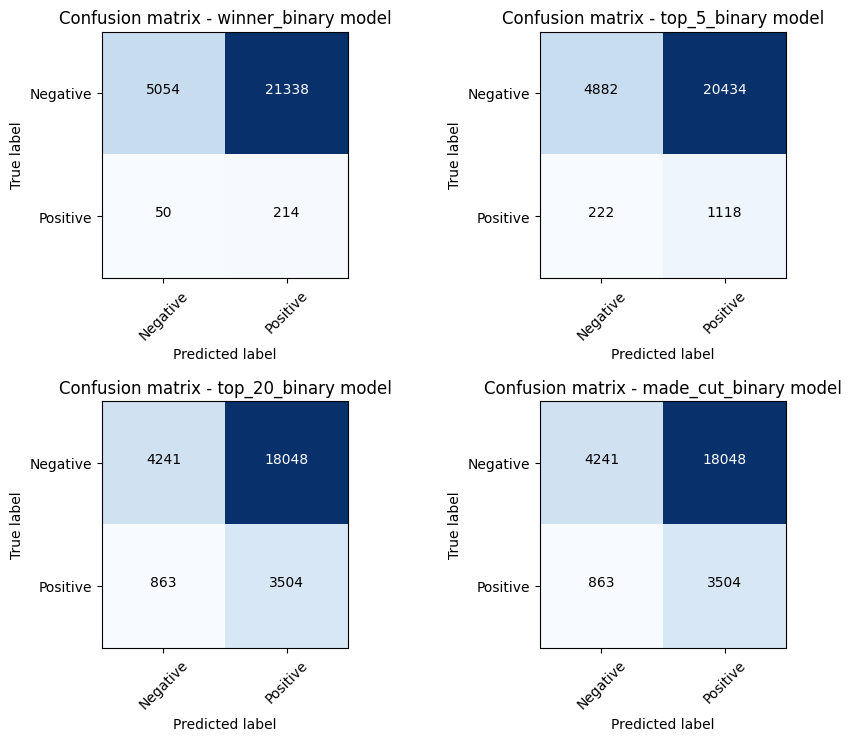

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

# Create a figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
plt.subplots_adjust(wspace=0.3, hspace=0.5)

# Define class labels
classes = ['Negative', 'Positive']

# Compute confusion matrix for winner_binary model
y_pred = gbc.predict(X_test)
cm = confusion_matrix(y_test_win, y_pred)
# Plot confusion matrix for winner_binary model
axs[0, 0].imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
axs[0, 0].set_title('Confusion matrix - winner_binary model')
tick_marks = np.arange(len(classes))
axs[0, 0].set_xticks(tick_marks)
axs[0, 0].set_xticklabels(classes, rotation=45)
axs[0, 0].set_yticks(tick_marks)
axs[0, 0].set_yticklabels(classes)
fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    axs[0, 0].text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
axs[0, 0].set_ylabel('True label')
axs[0, 0].set_xlabel('Predicted label')

# Compute confusion matrix for top_5_binary model
y_pred = gbc.predict(X_test)
cm = confusion_matrix(y_test_top5, y_pred)
# Plot confusion matrix for top_5_binary model
axs[0, 1].imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
axs[0, 1].set_title('Confusion matrix - top_5_binary model')
tick_marks = np.arange(len(classes))
axs[0, 1].set_xticks(tick_marks)
axs[0, 1].set_xticklabels(classes, rotation=45)
axs[0, 1].set_yticks(tick_marks)
axs[0, 1].set_yticklabels(classes)
fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    axs[0, 1].text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
axs[0, 1].set_ylabel('True label')
axs[0, 1].set_xlabel('Predicted label')

# Compute confusion matrix for top_20_binary model
y_pred = gbc.predict(X_test)
cm = confusion_matrix(y_test_top20, y_pred)
# Plot confusion matrix for top_20_binary model
axs[1, 0].imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
axs[1, 0].set_title('Confusion matrix - top_20_binary model')
tick_marks = np.arange(len(classes))
axs[1, 0].set_xticks(tick_marks)
axs[1, 0].set_xticklabels(classes, rotation=45)
axs[1, 0].set_yticks(tick_marks)
axs[1, 0].set_yticklabels(classes)
fmt = 'd'
thresh = cm.max() / 2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    axs[1, 0].text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
axs[1, 0].set_ylabel('True label')
axs[1, 0].set_xlabel('Predicted label')

# Compute confusion matrix for made_cut_binary model
y_pred = gbc.predict(X_test)
cm = confusion_matrix(y_test_top20, y_pred)
# Plot confusion matrix for top_20_binary model
axs[1, 1].imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
axs[1, 1].set_title('Confusion matrix - made_cut_binary model')
tick_marks = np.arange(len(classes))
axs[1, 1].set_xticks(tick_marks)
axs[1, 1].set_xticklabels(classes, rotation=45)
axs[1, 1].set_yticks(tick_marks)
axs[1, 1].set_yticklabels(classes)
fmt = 'd'
thresh = cm.max() / 2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    axs[1, 1].text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
axs[1, 1].set_ylabel('True label')
axs[1, 1].set_xlabel('Predicted label')




# XGBoost: 
XGBoost is an optimized gradient boosting algorithm that can handle imbalanced datasets. 

In [ ]:
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=10, random_state=42)

targets = [(y_train_win, y_test_win, "Winner Binary"),            (y_train_top5, y_test_top5, "Top 5 Binary"),            (y_train_top20, y_test_top20, "Top 20 Binary"),            (y_train_cut, y_test_cut, "Made Cut Binary")]

for y_train, y_test, label in targets:
    # fit and evaluate the model
    xgb.fit(X_train, y_train)
    y_pred_train = xgb.predict(X_train)
    y_pred_test = xgb.predict(X_test)

    # print accuracy scores
    print(f"\n{label}:")
    print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
    print("Testing Accuracy:", accuracy_score(y_test, y_pred_test))

    # print classification report
    xgb_pred = xgb.predict(X_test)
    xgb_report = classification_report(y_test, xgb_pred, zero_division=1)
    print(xgb_report)



Winner Binary:
Training Accuracy: 0.990417390185864
Testing Accuracy: 0.9900960384153662
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     26392
           1       1.00      0.00      0.00       264

    accuracy                           0.99     26656
   macro avg       1.00      0.50      0.50     26656
weighted avg       0.99      0.99      0.99     26656


Top 5 Binary:
Training Accuracy: 0.9506881471477265
Testing Accuracy: 0.9497298919567827
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     25316
           1       1.00      0.00      0.00      1340

    accuracy                           0.95     26656
   macro avg       0.97      0.50      0.49     26656
weighted avg       0.95      0.95      0.93     26656


Top 20 Binary:
Training Accuracy: 0.8426265354685188
Testing Accuracy: 0.8359468787515006
              precision    recall  f1-score   support

           0       0

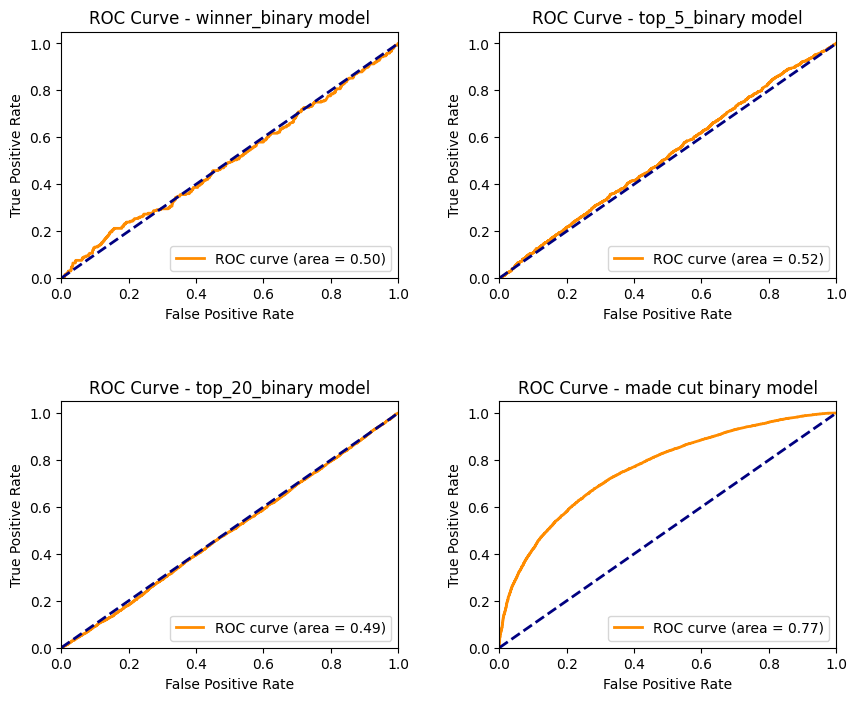

In [ ]:
# Create a figure with subplots

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
plt.subplots_adjust(wspace=0.3, hspace=0.5)

# Compute ROC curve and ROC area for winner_binary model
y_pred_proba = xgb.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_win, y_pred_proba)
roc_auc = roc_auc_score(y_test_win, y_pred_proba)

# Plot ROC curve for winner_binary model
axs[0, 0].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axs[0, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[0, 0].set_xlim([0.0, 1.0])
axs[0, 0].set_ylim([0.0, 1.05])
axs[0, 0].set_xlabel('False Positive Rate')
axs[0, 0].set_ylabel('True Positive Rate')
axs[0, 0].set_title('ROC Curve - winner_binary model')
axs[0, 0].legend(loc="lower right")

# Compute ROC curve and ROC area for top_5_binary model
y_pred_proba = xgb.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_top5, y_pred_proba)
roc_auc = roc_auc_score(y_test_top5, y_pred_proba)

# Plot ROC curve for top_5_binary model
axs[0, 1].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axs[0, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[0, 1].set_xlim([0.0, 1.0])
axs[0, 1].set_ylim([0.0, 1.05])
axs[0, 1].set_xlabel('False Positive Rate')
axs[0, 1].set_ylabel('True Positive Rate')
axs[0, 1].set_title('ROC Curve - top_5_binary model')
axs[0, 1].legend(loc="lower right")

# Compute ROC curve and ROC area for top_20_binary model
y_pred_proba = xgb.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_top20, y_pred_proba)
roc_auc = roc_auc_score(y_test_top20, y_pred_proba)

# Plot ROC curve for top_20_binary model
axs[1, 0].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axs[1, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[1, 0].set_xlim([0.0, 1.0])
axs[1, 0].set_ylim([0.0, 1.05])
axs[1, 0].set_xlabel('False Positive Rate')
axs[1, 0].set_ylabel('True Positive Rate')
axs[1, 0].set_title('ROC Curve - top_20_binary model')
axs[1, 0].legend(loc="lower right")

# Compute ROC curve and ROC area for made_cut_binary model
y_pred_proba = xgb.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_cut, y_pred_proba)
roc_auc = roc_auc_score(y_test_cut, y_pred_proba)

# Plot ROC curve for made_cut_binary model
axs[1, 1].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axs[1, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[1, 1].set_xlim([0.0, 1.0])
axs[1, 1].set_ylim([0.0, 1.05])
axs[1, 1].set_xlabel('False Positive Rate')
axs[1, 1].set_ylabel('True Positive Rate')
axs[1, 1].set_title('ROC Curve - made cut binary model')
axs[1, 1].legend(loc="lower right")


Text(0.5, 0, 'Predicted label')

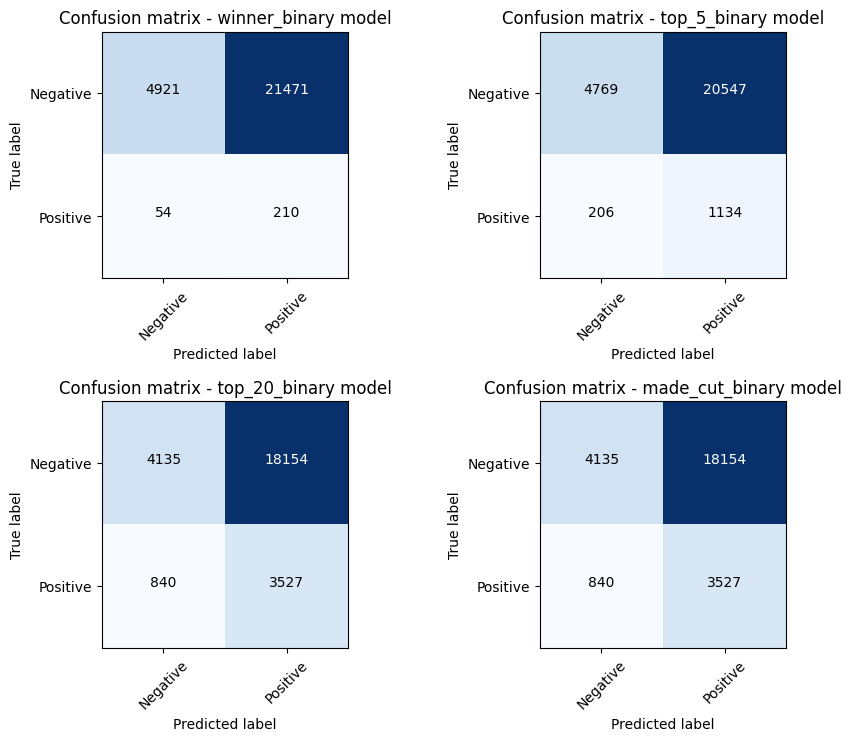

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

# Create a figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
plt.subplots_adjust(wspace=0.3, hspace=0.5)

# Define class labels
classes = ['Negative', 'Positive']

# Compute confusion matrix for winner_binary model
y_pred = xgb.predict(X_test)
cm = confusion_matrix(y_test_win, y_pred)
# Plot confusion matrix for winner_binary model
axs[0, 0].imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
axs[0, 0].set_title('Confusion matrix - winner_binary model')
tick_marks = np.arange(len(classes))
axs[0, 0].set_xticks(tick_marks)
axs[0, 0].set_xticklabels(classes, rotation=45)
axs[0, 0].set_yticks(tick_marks)
axs[0, 0].set_yticklabels(classes)
fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    axs[0, 0].text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
axs[0, 0].set_ylabel('True label')
axs[0, 0].set_xlabel('Predicted label')

# Compute confusion matrix for top_5_binary model
y_pred = xgb.predict(X_test)
cm = confusion_matrix(y_test_top5, y_pred)
# Plot confusion matrix for top_5_binary model
axs[0, 1].imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
axs[0, 1].set_title('Confusion matrix - top_5_binary model')
tick_marks = np.arange(len(classes))
axs[0, 1].set_xticks(tick_marks)
axs[0, 1].set_xticklabels(classes, rotation=45)
axs[0, 1].set_yticks(tick_marks)
axs[0, 1].set_yticklabels(classes)
fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    axs[0, 1].text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
axs[0, 1].set_ylabel('True label')
axs[0, 1].set_xlabel('Predicted label')

# Compute confusion matrix for top_20_binary model
y_pred = xgb.predict(X_test)
cm = confusion_matrix(y_test_top20, y_pred)
# Plot confusion matrix for top_20_binary model
axs[1, 0].imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
axs[1, 0].set_title('Confusion matrix - top_20_binary model')
tick_marks = np.arange(len(classes))
axs[1, 0].set_xticks(tick_marks)
axs[1, 0].set_xticklabels(classes, rotation=45)
axs[1, 0].set_yticks(tick_marks)
axs[1, 0].set_yticklabels(classes)
fmt = 'd'
thresh = cm.max() / 2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    axs[1, 0].text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
axs[1, 0].set_ylabel('True label')
axs[1, 0].set_xlabel('Predicted label')

# Compute confusion matrix for made_cut_binary model
y_pred = xgb.predict(X_test)
cm = confusion_matrix(y_test_top20, y_pred)
# Plot confusion matrix for top_20_binary model
axs[1, 1].imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
axs[1, 1].set_title('Confusion matrix - made_cut_binary model')
tick_marks = np.arange(len(classes))
axs[1, 1].set_xticks(tick_marks)
axs[1, 1].set_xticklabels(classes, rotation=45)
axs[1, 1].set_yticks(tick_marks)
axs[1, 1].set_yticklabels(classes)
fmt = 'd'
thresh = cm.max() / 2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    axs[1, 1].text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
axs[1, 1].set_ylabel('True label')
axs[1, 1].set_xlabel('Predicted label')




# **regularization**

logistic regression regularization

In [ ]:
# Define logistic regression model with L2 regularization and increased max_iter
lr_l2 = LogisticRegression(random_state=42, max_iter=1000, penalty='l2')

# Train and evaluate model for each target variable
targets = [('Winner Binary', y_train_win, y_test_win),
           ('Top 5 Binary', y_train_top5, y_test_top5),
           ('Top 20 Binary', y_train_top20, y_test_top20),
           ('Made Cut Binary', y_train_cut, y_test_cut)]

for name, y_train, y_test in targets:
    # Fit the model and make predictions
    lr_l2.fit(X_train, y_train)
    y_pred_train = lr_l2.predict(X_train)
    y_pred_test = lr_l2.predict(X_test)

    # Print training and testing accuracy
    print(f"\n{name}:")
    print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
    print("Testing Accuracy:", accuracy_score(y_test, y_pred_test))

    # Print classification report
    log_pred = lr_l2.predict(X_test)
    log_report = classification_report(y_test, log_pred, zero_division=0)
    print(log_report)



Winner Binary:
Training Accuracy: 0.9900797478937552
Testing Accuracy: 0.9900960384153662
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     26392
           1       0.00      0.00      0.00       264

    accuracy                           0.99     26656
   macro avg       0.50      0.50      0.50     26656
weighted avg       0.98      0.99      0.99     26656


Top 5 Binary:
Training Accuracy: 0.9497556112933307
Testing Accuracy: 0.9497298919567827
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     25316
           1       0.00      0.00      0.00      1340

    accuracy                           0.95     26656
   macro avg       0.47      0.50      0.49     26656
weighted avg       0.90      0.95      0.93     26656


Top 20 Binary:
Training Accuracy: 0.8361952537140652
Testing Accuracy: 0.836171968787515
              precision    recall  f1-score   support

           0       0

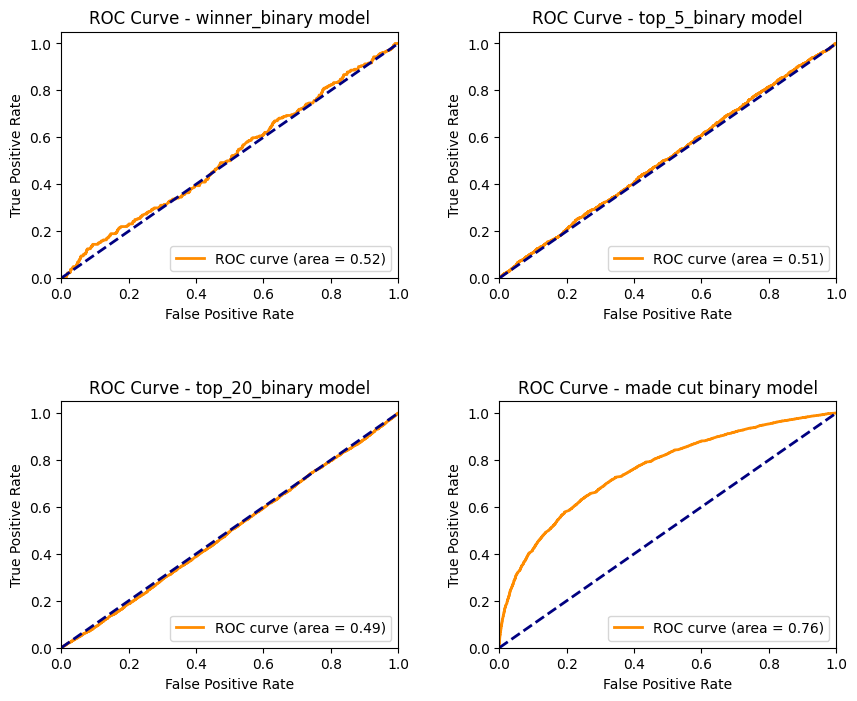

In [ ]:
# Create a figure with subplots

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
plt.subplots_adjust(wspace=0.3, hspace=0.5)

# Compute ROC curve and ROC area for winner_binary model
y_pred_proba = lr_l2.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_win, y_pred_proba)
roc_auc = roc_auc_score(y_test_win, y_pred_proba)

# Plot ROC curve for winner_binary model
axs[0, 0].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axs[0, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[0, 0].set_xlim([0.0, 1.0])
axs[0, 0].set_ylim([0.0, 1.05])
axs[0, 0].set_xlabel('False Positive Rate')
axs[0, 0].set_ylabel('True Positive Rate')
axs[0, 0].set_title('ROC Curve - winner_binary model')
axs[0, 0].legend(loc="lower right")

# Compute ROC curve and ROC area for top_5_binary model
y_pred_proba = lr_l2.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_top5, y_pred_proba)
roc_auc = roc_auc_score(y_test_top5, y_pred_proba)

# Plot ROC curve for top_5_binary model
axs[0, 1].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axs[0, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[0, 1].set_xlim([0.0, 1.0])
axs[0, 1].set_ylim([0.0, 1.05])
axs[0, 1].set_xlabel('False Positive Rate')
axs[0, 1].set_ylabel('True Positive Rate')
axs[0, 1].set_title('ROC Curve - top_5_binary model')
axs[0, 1].legend(loc="lower right")

# Compute ROC curve and ROC area for top_20_binary model
y_pred_proba = lr_l2.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_top20, y_pred_proba)
roc_auc = roc_auc_score(y_test_top20, y_pred_proba)

# Plot ROC curve for top_20_binary model
axs[1, 0].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axs[1, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[1, 0].set_xlim([0.0, 1.0])
axs[1, 0].set_ylim([0.0, 1.05])
axs[1, 0].set_xlabel('False Positive Rate')
axs[1, 0].set_ylabel('True Positive Rate')
axs[1, 0].set_title('ROC Curve - top_20_binary model')
axs[1, 0].legend(loc="lower right")

# Compute ROC curve and ROC area for made_cut_binary model
y_pred_proba = lr_l2.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_cut, y_pred_proba)
roc_auc = roc_auc_score(y_test_cut, y_pred_proba)

# Plot ROC curve for made_cut_binary model
axs[1, 1].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axs[1, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[1, 1].set_xlim([0.0, 1.0])
axs[1, 1].set_ylim([0.0, 1.05])
axs[1, 1].set_xlabel('False Positive Rate')
axs[1, 1].set_ylabel('True Positive Rate')
axs[1, 1].set_title('ROC Curve - made cut binary model')
axs[1, 1].legend(loc="lower right")


Naive Bayes regularization

In [ ]:
from sklearn.naive_bayes import ComplementNB

# Define Complement Naive Bayes model with L2 regularization
cnb = ComplementNB(alpha=1.0, norm=True)

# Train and evaluate model for each target variable
targets = [('Winner Binary', y_train_win, y_test_win),
           ('Top 5 Binary', y_train_top5, y_test_top5),
           ('Top 20 Binary', y_train_top20, y_test_top20),
           ('Made Cut Binary', y_train_cut, y_test_cut)]

for name, y_train, y_test in targets:
    # Fit the model and make predictions
    cnb.fit(X_train, y_train)
    y_pred_train = cnb.predict(X_train)
    y_pred_test = cnb.predict(X_test)

    # Print training and testing accuracy
    print(f"\n{name}:")
    print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
    print("Testing Accuracy:", accuracy_score(y_test, y_pred_test))

    # Print classification report
    log_pred = cnb.predict(X_test)
    log_report = classification_report(y_test, log_pred, zero_division=0)
    print(log_report)


ValueError: ignored

Random Forest Classifier regularization

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Define random forest model with L2 regularization
rfc_l2 = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10, max_features='sqrt')
    
# Train and evaluate model for each target variable
targets = [('Winner Binary', y_train_win, y_test_win),
           ('Top 5 Binary', y_train_top5, y_test_top5),
           ('Top 20 Binary', y_train_top20, y_test_top20),
           ('Made Cut Binary', y_train_cut, y_test_cut)]

for name, y_train, y_test in targets:
    # Fit the model and make predictions
    rfc_l2.fit(X_train, y_train)
    y_pred_train = rfc_l2.predict(X_train)
    y_pred_test = rfc_l2.predict(X_test)

    # Print training and testing accuracy
    print(f"\n{name}:")
    print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
    print("Testing Accuracy:", accuracy_score(y_test, y_pred_test))

    # Print classification report
    rfc_pred = rfc_l2.predict(X_test)
    rfc_report = classification_report(y_test, rfc_pred, zero_division=0)
    print(rfc_report)



Winner Binary:
Training Accuracy: 0.9901279825069136
Testing Accuracy: 0.9900960384153662
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     26392
           1       0.00      0.00      0.00       264

    accuracy                           0.99     26656
   macro avg       0.50      0.50      0.50     26656
weighted avg       0.98      0.99      0.99     26656


Top 5 Binary:
Training Accuracy: 0.9498038459064891
Testing Accuracy: 0.9496923769507803
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     25316
           1       0.00      0.00      0.00      1340

    accuracy                           0.95     26656
   macro avg       0.47      0.50      0.49     26656
weighted avg       0.90      0.95      0.93     26656


Top 20 Binary:
Training Accuracy: 0.8363560357579266
Testing Accuracy: 0.8361344537815126
              precision    recall  f1-score   support

           0       

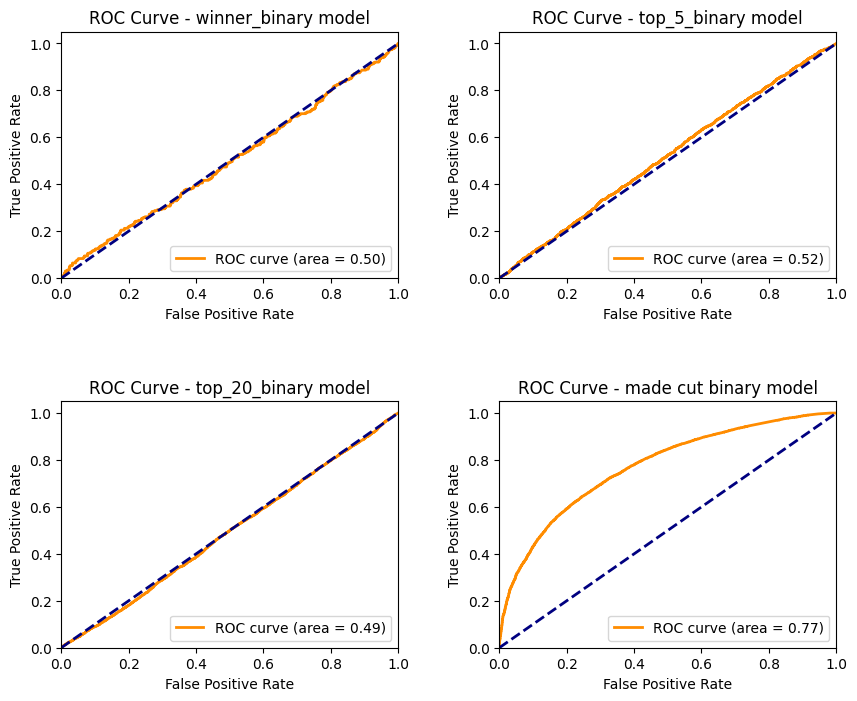

In [ ]:
# Create a figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
plt.subplots_adjust(wspace=0.3, hspace=0.5)

# Compute ROC curve and ROC area for winner_binary model
y_pred_proba = rfc_l2.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_win, y_pred_proba)
roc_auc = roc_auc_score(y_test_win, y_pred_proba)

# Plot ROC curve for winner_binary model
axs[0, 0].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axs[0, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[0, 0].set_xlim([0.0, 1.0])
axs[0, 0].set_ylim([0.0, 1.05])
axs[0, 0].set_xlabel('False Positive Rate')
axs[0, 0].set_ylabel('True Positive Rate')
axs[0, 0].set_title('ROC Curve - winner_binary model')
axs[0, 0].legend(loc="lower right")

# Compute ROC curve and ROC area for top_5_binary model
y_pred_proba = rfc_l2.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_top5, y_pred_proba)
roc_auc = roc_auc_score(y_test_top5, y_pred_proba)

# Plot ROC curve for top_5_binary model
axs[0, 1].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axs[0, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[0, 1].set_xlim([0.0, 1.0])
axs[0, 1].set_ylim([0.0, 1.05])
axs[0, 1].set_xlabel('False Positive Rate')
axs[0, 1].set_ylabel('True Positive Rate')
axs[0, 1].set_title('ROC Curve - top_5_binary model')
axs[0, 1].legend(loc="lower right")

# Compute ROC curve and ROC area for top_20_binary model
y_pred_proba = rfc_l2.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_top20, y_pred_proba)
roc_auc = roc_auc_score(y_test_top20, y_pred_proba)

# Plot ROC curve for top_20_binary model
axs[1, 0].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axs[1, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[1, 0].set_xlim([0.0, 1.0])
axs[1, 0].set_ylim([0.0, 1.05])
axs[1, 0].set_xlabel('False Positive Rate')
axs[1, 0].set_ylabel('True Positive Rate')
axs[1, 0].set_title('ROC Curve - top_20_binary model')
axs[1, 0].legend(loc="lower right")

# Compute ROC curve and ROC area for made_cut_binary model
y_pred_proba = rfc_l2.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_cut, y_pred_proba)
roc_auc = roc_auc_score(y_test_cut, y_pred_proba)

# Plot ROC curve for made_cut_binary model
axs[1, 1].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axs[1, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[1, 1].set_xlim([0.0, 1.0])
axs[1, 1].set_ylim([0.0, 1.05])
axs[1, 1].set_xlabel('False Positive Rate')
axs[1, 1].set_ylabel('True Positive Rate')
axs[1, 1].set_title('ROC Curve - made cut binary model')
axs[1, 1].legend(loc="lower right")

Gradient Boostedclassifier regularization

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Define gradient boosted trees model with L2 regularization
gbc_l2 = GradientBoostingClassifier(random_state=42, n_estimators=100, max_depth=10, max_features='sqrt')

# Train and evaluate model for each target variable
targets = [('Winner Binary', y_train_win, y_test_win),
           ('Top 5 Binary', y_train_top5, y_test_top5),
           ('Top 20 Binary', y_train_top20, y_test_top20),
           ('Made Cut Binary', y_train_cut, y_test_cut)]

for name, y_train, y_test in targets:
    # Fit the model and make predictions
    gbc_l2.fit(X_train, y_train)
    y_pred_train = gbc_l2.predict(X_train)
    y_pred_test = gbc_l2.predict(X_test)

    # Print training and testing accuracy
    print(f"\n{name}:")
    print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
    print("Testing Accuracy:", accuracy_score(y_test, y_pred_test))

    # Print classification report
    gbc_pred = gbc_l2.predict(X_test)
    gbc_report = classification_report(y_test, gbc_pred, zero_division=0)
    print(gbc_report)



Winner Binary:
Training Accuracy: 0.999646279503505
Testing Accuracy: 0.9851440576230492
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     26392
           1       0.00      0.00      0.00       264

    accuracy                           0.99     26656
   macro avg       0.50      0.50      0.50     26656
weighted avg       0.98      0.99      0.98     26656


Top 5 Binary:
Training Accuracy: 0.9659463631101679
Testing Accuracy: 0.9491296518607443
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     25316
           1       0.06      0.00      0.00      1340

    accuracy                           0.95     26656
   macro avg       0.50      0.50      0.49     26656
weighted avg       0.90      0.95      0.93     26656


Top 20 Binary:
Training Accuracy: 0.858334941153772
Testing Accuracy: 0.8351965786314526
              precision    recall  f1-score   support

           0       0.

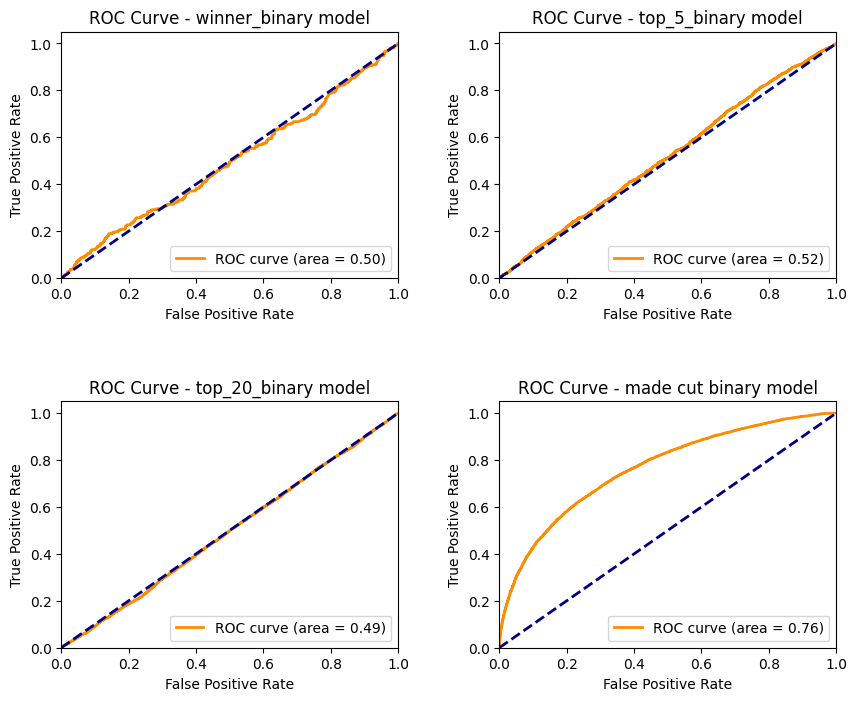

In [ ]:
# Create a figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
plt.subplots_adjust(wspace=0.3, hspace=0.5)

# Compute ROC curve and ROC area for winner_binary model
y_pred_proba = gbc_l2.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_win, y_pred_proba)
roc_auc = roc_auc_score(y_test_win, y_pred_proba)

# Plot ROC curve for winner_binary model
axs[0, 0].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axs[0, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[0, 0].set_xlim([0.0, 1.0])
axs[0, 0].set_ylim([0.0, 1.05])
axs[0, 0].set_xlabel('False Positive Rate')
axs[0, 0].set_ylabel('True Positive Rate')
axs[0, 0].set_title('ROC Curve - winner_binary model')
axs[0, 0].legend(loc="lower right")

# Compute ROC curve and ROC area for top_5_binary model
y_pred_proba = gbc_l2.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_top5, y_pred_proba)
roc_auc = roc_auc_score(y_test_top5, y_pred_proba)

# Plot ROC curve for top_5_binary model
axs[0, 1].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axs[0, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[0, 1].set_xlim([0.0, 1.0])
axs[0, 1].set_ylim([0.0, 1.05])
axs[0, 1].set_xlabel('False Positive Rate')
axs[0, 1].set_ylabel('True Positive Rate')
axs[0, 1].set_title('ROC Curve - top_5_binary model')
axs[0, 1].legend(loc="lower right")

# Compute ROC curve and ROC area for top_20_binary model
y_pred_proba = gbc_l2.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_top20, y_pred_proba)
roc_auc = roc_auc_score(y_test_top20, y_pred_proba)

# Plot ROC curve for top_20_binary model
axs[1, 0].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axs[1, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[1, 0].set_xlim([0.0, 1.0])
axs[1, 0].set_ylim([0.0, 1.05])
axs[1, 0].set_xlabel('False Positive Rate')
axs[1, 0].set_ylabel('True Positive Rate')
axs[1, 0].set_title('ROC Curve - top_20_binary model')
axs[1, 0].legend(loc="lower right")

# Compute ROC curve and ROC area for made_cut_binary model
y_pred_proba = gbc_l2.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_cut, y_pred_proba)
roc_auc = roc_auc_score(y_test_cut, y_pred_proba)

# Plot ROC curve for made_cut_binary model
axs[1, 1].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axs[1, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[1, 1].set_xlim([0.0, 1.0])
axs[1, 1].set_ylim([0.0, 1.05])
axs[1, 1].set_xlabel('False Positive Rate')
axs[1, 1].set_ylabel('True Positive Rate')
axs[1, 1].set_title('ROC Curve - made cut binary model')
axs[1, 1].legend(loc="lower right")

XGBoost regularization

In [ ]:
from xgboost import XGBClassifier

# Define XGBoost model with L2 regularization
xgb_l2 = XGBClassifier(random_state=42, n_estimators=100, max_depth=10)

# Train and evaluate model for each target variable
targets = [('Winner Binary', y_train_win, y_test_win),
           ('Top 5 Binary', y_train_top5, y_test_top5),
           ('Top 20 Binary', y_train_top20, y_test_top20),
           ('Made Cut Binary', y_train_cut, y_test_cut)]

for name, y_train, y_test in targets:
    # Fit the model and make predictions
    xgb_l2.fit(X_train, y_train)
    y_pred_train = xgb_l2.predict(X_train)
    y_pred_test = xgb_l2.predict(X_test)

    # Print training and testing accuracy
    print(f"\n{name}:")
    print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
    print("Testing Accuracy:", accuracy_score(y_test, y_pred_test))

    # Print classification report
    xgb_pred = xgb_l2.predict(X_test)
    xgb_report = classification_report(y_test, xgb_pred, zero_division=0)
    print(xgb_report)



Winner Binary:
Training Accuracy: 0.9991317769631488
Testing Accuracy: 0.9900960384153662
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     26392
           1       0.00      0.00      0.00       264

    accuracy                           0.99     26656
   macro avg       0.50      0.50      0.50     26656
weighted avg       0.98      0.99      0.99     26656


Top 5 Binary:
Training Accuracy: 0.9706090423821467
Testing Accuracy: 0.9493547418967587
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     25316
           1       0.08      0.00      0.00      1340

    accuracy                           0.95     26656
   macro avg       0.52      0.50      0.49     26656
weighted avg       0.91      0.95      0.93     26656


Top 20 Binary:
Training Accuracy: 0.8936265997813364
Testing Accuracy: 0.8314450780312125
              precision    recall  f1-score   support

           0       

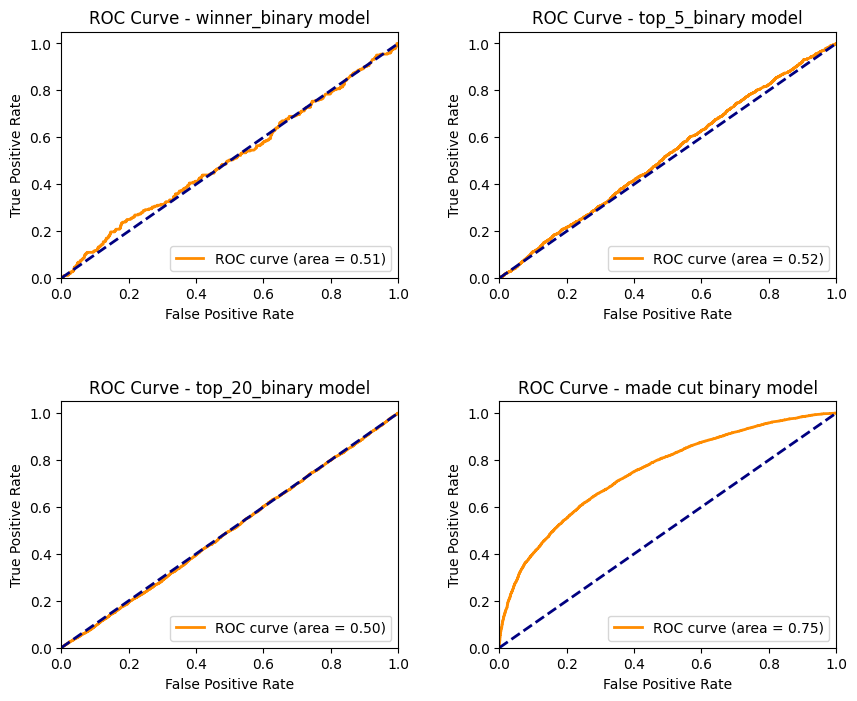

In [ ]:
# Create a figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
plt.subplots_adjust(wspace=0.3, hspace=0.5)

# Compute ROC curve and ROC area for winner_binary model
y_pred_proba = xgb_l2.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_win, y_pred_proba)
roc_auc = roc_auc_score(y_test_win, y_pred_proba)

# Plot ROC curve for winner_binary model
axs[0, 0].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axs[0, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[0, 0].set_xlim([0.0, 1.0])
axs[0, 0].set_ylim([0.0, 1.05])
axs[0, 0].set_xlabel('False Positive Rate')
axs[0, 0].set_ylabel('True Positive Rate')
axs[0, 0].set_title('ROC Curve - winner_binary model')
axs[0, 0].legend(loc="lower right")

# Compute ROC curve and ROC area for top_5_binary model
y_pred_proba = xgb_l2.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_top5, y_pred_proba)
roc_auc = roc_auc_score(y_test_top5, y_pred_proba)

# Plot ROC curve for top_5_binary model
axs[0, 1].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axs[0, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[0, 1].set_xlim([0.0, 1.0])
axs[0, 1].set_ylim([0.0, 1.05])
axs[0, 1].set_xlabel('False Positive Rate')
axs[0, 1].set_ylabel('True Positive Rate')
axs[0, 1].set_title('ROC Curve - top_5_binary model')
axs[0, 1].legend(loc="lower right")

# Compute ROC curve and ROC area for top_20_binary model
y_pred_proba = xgb_l2.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_top20, y_pred_proba)
roc_auc = roc_auc_score(y_test_top20, y_pred_proba)

# Plot ROC curve for top_20_binary model
axs[1, 0].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axs[1, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[1, 0].set_xlim([0.0, 1.0])
axs[1, 0].set_ylim([0.0, 1.05])
axs[1, 0].set_xlabel('False Positive Rate')
axs[1, 0].set_ylabel('True Positive Rate')
axs[1, 0].set_title('ROC Curve - top_20_binary model')
axs[1, 0].legend(loc="lower right")

# Compute ROC curve and ROC area for made_cut_binary model
y_pred_proba = xgb_l2.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_cut, y_pred_proba)
roc_auc = roc_auc_score(y_test_cut, y_pred_proba)

# Plot ROC curve for made_cut_binary model
axs[1, 1].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axs[1, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[1, 1].set_xlim([0.0, 1.0])
axs[1, 1].set_ylim([0.0, 1.05])
axs[1, 1].set_xlabel('False Positive Rate')
axs[1, 1].set_ylabel('True Positive Rate')
axs[1, 1].set_title('ROC Curve - made cut binary model')
axs[1, 1].legend(loc="lower right")

# Imbalanced Data

# Undersampling

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

# Resample each class separately
undersampler = RandomUnderSampler(random_state=42)

X_resampled_win, y_resampled_win = undersampler.fit_resample(X, y_win)
X_resampled_top5, y_resampled_top5 = undersampler.fit_resample(X, y_top5)
X_resampled_top20, y_resampled_top20 = undersampler.fit_resample(X, y_top20)
X_resampled_cut, y_resampled_cut = undersampler.fit_resample(X, y_cut)

# Split the resampled data into training and test sets, stratifying on the target variables
X_train_win, X_test_win, y_train_win, y_test_win = train_test_split(X_resampled_win, y_resampled_win, test_size=0.3, random_state=42, stratify=y_resampled_win)
X_train_top5, X_test_top5, y_train_top5, y_test_top5 = train_test_split(X_resampled_top5, y_resampled_top5, test_size=0.3, random_state=42, stratify=y_resampled_top5)
X_train_top20, X_test_top20, y_train_top20, y_test_top20 = train_test_split(X_resampled_top20, y_resampled_top20, test_size=0.3, random_state=42, stratify=y_resampled_top20)
X_train_cut, X_test_cut, y_train_cut, y_test_cut = train_test_split(X_resampled_cut, y_resampled_cut, test_size=0.3, random_state=42, stratify=y_resampled_cut)


In [ ]:
# Print value counts for target variables in the training set
print("Training Set:")
print("Winner Binary:\n", y_train_win.value_counts())
print("Top 5 Binary:\n", y_train_top5.value_counts())
print("Top 20 Binary:\n", y_train_top20.value_counts())
print("Made Cut Binary:\n", y_train_cut.value_counts())

# Print value counts for target variables in the test set
print("\nTest Set:")
print("Winner Binary:\n", y_test_win.value_counts())
print("Top 5 Binary:\n", y_test_top5.value_counts())
print("Top 20 Binary:\n", y_test_top20.value_counts())
print("Made Cut Binary:\n", y_test_cut.value_counts())


Training Set:
Winner Binary:
 1    617
0    616
Name: winner_binary, dtype: int64
Top 5 Binary:
 1    3126
0    3125
Name: top_5_binary, dtype: int64
Top 20 Binary:
 1    10189
0    10188
Name: top_20_binary, dtype: int64
Made Cut Binary:
 0    18509
1    18509
Name: made_cut_binary, dtype: int64

Test Set:
Winner Binary:
 0    265
1    264
Name: winner_binary, dtype: int64
Top 5 Binary:
 0    1340
1    1339
Name: top_5_binary, dtype: int64
Top 20 Binary:
 0    4367
1    4366
Name: top_20_binary, dtype: int64
Made Cut Binary:
 1    7933
0    7933
Name: made_cut_binary, dtype: int64


## Logistic regression resampled

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# create the model
lr = LogisticRegression()

# fit and evaluate the model for winner_binary
lr.fit(X_train_win, y_train_win)
y_pred_train = lr.predict(X_train_win)
y_pred_test = lr.predict(X_test_win)

print("Winner Binary:")
print("Training Accuracy:", accuracy_score(y_train_win, y_pred_train))
print("Testing Accuracy:", accuracy_score(y_test_win, y_pred_test))

# classification report for accuracy of predictions for winner
lr_pred = lr.predict(X_test_win)
lr_report = classification_report(y_test_win, lr_pred, zero_division=0)
print(lr_report)

# fit and evaluate the model for top_5_binary
lr.fit(X_train_top5, y_train_top5)
y_pred_train = lr.predict(X_train_top5)
y_pred_test = lr.predict(X_test_top5)

print("\nTop 5 Binary:")
print("Training Accuracy:", accuracy_score(y_train_top5, y_pred_train))
print("Testing Accuracy:", accuracy_score(y_test_top5, y_pred_test))

# classification report for accuracy of predictions for top 5
lr_pred = lr.predict(X_test_top5)
lr_report = classification_report(y_test_top5, lr_pred, zero_division=0)
print(lr_report)

# fit and evaluate the model for top_20_binary
lr.fit(X_train_top20, y_train_top20)
y_pred_train = lr.predict(X_train_top20)
y_pred_test = lr.predict(X_test_top20)

print("\nTop 20 Binary:")
print("Training Accuracy:", accuracy_score(y_train_top20, y_pred_train))
print("Testing Accuracy:", accuracy_score(y_test_top20, y_pred_test))

# classification report for accuracy of predictions for top 20
lr_pred = lr.predict(X_test_top20)
lr_report = classification_report(y_test_top20, lr_pred, zero_division=0)
print(lr_report)

# fit and evaluate the model for made_cut_binary
lr.fit(X_train_cut, y_train_cut)
y_pred_train = lr.predict(X_train_cut)
y_pred_test = lr.predict(X_test_cut)

print("\nMade Cut Binary:")
print("Training Accuracy:", accuracy_score(y_train_cut, y_pred_train))
print("Testing Accuracy:", accuracy_score(y_test_cut, y_pred_test))

#classification report for accuracy of predictions for cut
lr_pred = lr.predict(X_test_cut)
lr_report = classification_report(y_test_cut, lr_pred, zero_division=0)
print(lr_report)


Winner Binary:
Training Accuracy: 0.7696674776966748
Testing Accuracy: 0.7618147448015122
              precision    recall  f1-score   support

           0       0.78      0.74      0.76       265
           1       0.75      0.79      0.77       264

    accuracy                           0.76       529
   macro avg       0.76      0.76      0.76       529
weighted avg       0.76      0.76      0.76       529


Top 5 Binary:
Training Accuracy: 0.7126859702447609
Testing Accuracy: 0.7338559163867114
              precision    recall  f1-score   support

           0       0.74      0.71      0.73      1340
           1       0.72      0.75      0.74      1339

    accuracy                           0.73      2679
   macro avg       0.73      0.73      0.73      2679
weighted avg       0.73      0.73      0.73      2679


Top 20 Binary:
Training Accuracy: 0.6688913971634686
Testing Accuracy: 0.659223634489866
              precision    recall  f1-score   support

           0       0.

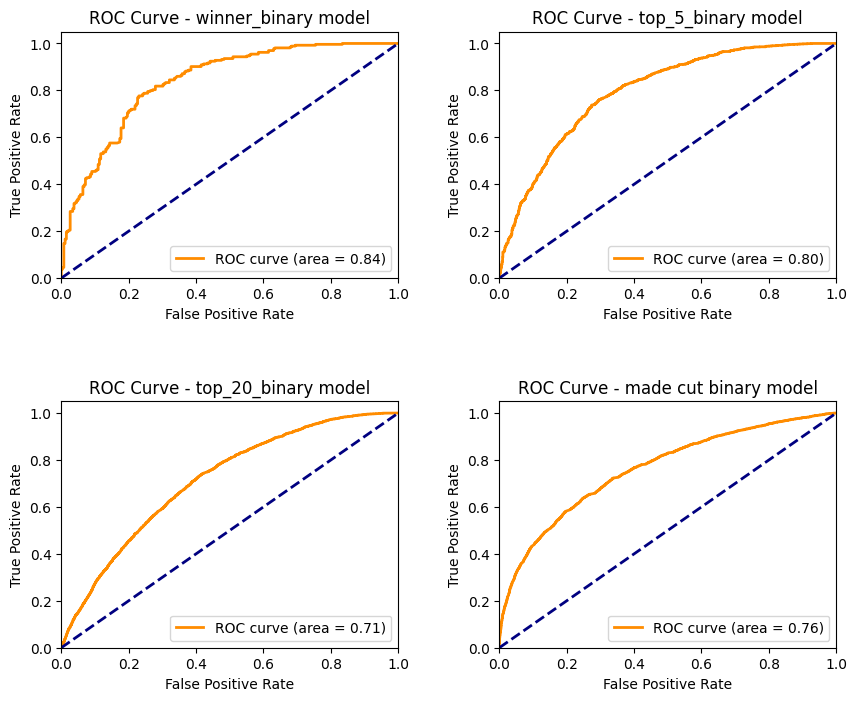

In [ ]:
# Create a figure with subplots

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
plt.subplots_adjust(wspace=0.3, hspace=0.5)

# Compute ROC curve and ROC area for winner_binary model
y_pred_proba = lr.predict_proba(X_test_win)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_win, y_pred_proba)
roc_auc = roc_auc_score(y_test_win, y_pred_proba)

# Plot ROC curve for winner_binary model
axs[0, 0].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axs[0, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[0, 0].set_xlim([0.0, 1.0])
axs[0, 0].set_ylim([0.0, 1.05])
axs[0, 0].set_xlabel('False Positive Rate')
axs[0, 0].set_ylabel('True Positive Rate')
axs[0, 0].set_title('ROC Curve - winner_binary model')
axs[0, 0].legend(loc="lower right")

# Compute ROC curve and ROC area for top_5_binary model
y_pred_proba = lr.predict_proba(X_test_top5)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_top5, y_pred_proba)
roc_auc = roc_auc_score(y_test_top5, y_pred_proba)

# Plot ROC curve for top_5_binary model
axs[0, 1].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axs[0, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[0, 1].set_xlim([0.0, 1.0])
axs[0, 1].set_ylim([0.0, 1.05])
axs[0, 1].set_xlabel('False Positive Rate')
axs[0, 1].set_ylabel('True Positive Rate')
axs[0, 1].set_title('ROC Curve - top_5_binary model')
axs[0, 1].legend(loc="lower right")

# Compute ROC curve and ROC area for top_20_binary model
y_pred_proba = lr.predict_proba(X_test_top20)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_top20, y_pred_proba)
roc_auc = roc_auc_score(y_test_top20, y_pred_proba)

# Plot ROC curve for top_20_binary model
axs[1, 0].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axs[1, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[1, 0].set_xlim([0.0, 1.0])
axs[1, 0].set_ylim([0.0, 1.05])
axs[1, 0].set_xlabel('False Positive Rate')
axs[1, 0].set_ylabel('True Positive Rate')
axs[1, 0].set_title('ROC Curve - top_20_binary model')
axs[1, 0].legend(loc="lower right")

# Compute ROC curve and ROC area for made_cut_binary model
y_pred_proba = lr.predict_proba(X_test_cut)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_cut, y_pred_proba)
roc_auc = roc_auc_score(y_test_cut, y_pred_proba)

# Plot ROC curve for made_cut_binary model
axs[1, 1].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axs[1, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[1, 1].set_xlim([0.0, 1.0])
axs[1, 1].set_ylim([0.0, 1.05])
axs[1, 1].set_xlabel('False Positive Rate')
axs[1, 1].set_ylabel('True Positive Rate')
axs[1, 1].set_title('ROC Curve - made cut binary model')
axs[1, 1].legend(loc="lower right")


# Naive Bayes

In [ ]:
# create the model
nb = GaussianNB()

# fit and evaluate the model for winner_binary
nb.fit(X_train_win, y_train_win)
y_pred_train = nb.predict(X_train_win)
y_pred_test = nb.predict(X_test_win)

print("Winner Binary:")
print("Training Accuracy:", accuracy_score(y_train_win, y_pred_train))
print("Testing Accuracy:", accuracy_score(y_test_win, y_pred_test))

# classification report for accuracy of predictions for winner
nb_pred = nb.predict(X_test_win)
nb_report = classification_report(y_test_win, nb_pred, zero_division=0)
print(nb_report)

# fit and evaluate the model for top_5_binary
nb.fit(X_train_top5, y_train_top5)
y_pred_train = nb.predict(X_train_top5)
y_pred_test = nb.predict(X_test_top5)

print("\nTop 5 Binary:")
print("Training Accuracy:", accuracy_score(y_train_top5, y_pred_train))
print("Testing Accuracy:", accuracy_score(y_test_top5, y_pred_test))

# classification report for accuracy of predictions for top 5
nb_pred = nb.predict(X_test_top5)
nb_report = classification_report(y_test_top5, nb_pred, zero_division=0)
print(nb_report)

# fit and evaluate the model for top_20_binary
nb.fit(X_train_top20, y_train_top20)
y_pred_train = nb.predict(X_train_top20)
y_pred_test = nb.predict(X_test_top20)

print("\nTop 20 Binary:")
print("Training Accuracy:", accuracy_score(y_train_top20, y_pred_train))
print("Testing Accuracy:", accuracy_score(y_test_top20, y_pred_test))

# classification report for accuracy of predictions for top 20
nb_pred = nb.predict(X_test_top20)
nb_report = classification_report(y_test_top20, nb_pred, zero_division=0)
print(nb_report)

# fit and evaluate the model for made_cut_binary
nb.fit(X_train_cut, y_train_cut)
y_pred_train = nb.predict(X_train_cut)
y_pred_test = nb.predict(X_test_cut)

print("\nMade Cut Binary:")
print("Training Accuracy:", accuracy_score(y_train_cut, y_pred_train))
print("Testing Accuracy:", accuracy_score(y_test_cut, y_pred_test))

#classification report for accuracy of predictions for cut
nb_pred = nb.predict(X_test_cut)
nb_report = classification_report(y_test_cut, nb_pred, zero_division=0)
print(nb_report)




Winner Binary:
Training Accuracy: 0.7364152473641524
Testing Accuracy: 0.7561436672967864
              precision    recall  f1-score   support

           0       0.79      0.69      0.74       265
           1       0.73      0.82      0.77       264

    accuracy                           0.76       529
   macro avg       0.76      0.76      0.76       529
weighted avg       0.76      0.76      0.76       529


Top 5 Binary:
Training Accuracy: 0.6984482482802752
Testing Accuracy: 0.70996640537514
              precision    recall  f1-score   support

           0       0.74      0.64      0.69      1340
           1       0.68      0.78      0.73      1339

    accuracy                           0.71      2679
   macro avg       0.71      0.71      0.71      2679
weighted avg       0.71      0.71      0.71      2679


Top 20 Binary:
Training Accuracy: 0.6550522648083623
Testing Accuracy: 0.6439940455742585
              precision    recall  f1-score   support

           0       0.6

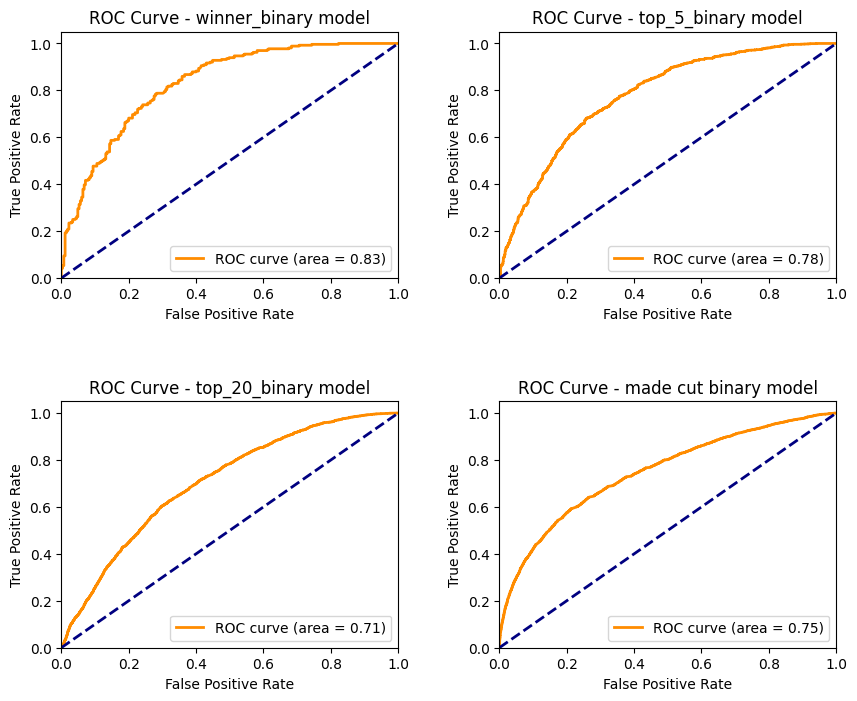

In [ ]:
# Create a figure with subplots

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
plt.subplots_adjust(wspace=0.3, hspace=0.5)

# Compute ROC curve and ROC area for winner_binary model
y_pred_proba = nb.predict_proba(X_test_win)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_win, y_pred_proba)
roc_auc = roc_auc_score(y_test_win, y_pred_proba)

# Plot ROC curve for winner_binary model
axs[0, 0].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axs[0, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[0, 0].set_xlim([0.0, 1.0])
axs[0, 0].set_ylim([0.0, 1.05])
axs[0, 0].set_xlabel('False Positive Rate')
axs[0, 0].set_ylabel('True Positive Rate')
axs[0, 0].set_title('ROC Curve - winner_binary model')
axs[0, 0].legend(loc="lower right")

# Compute ROC curve and ROC area for top_5_binary model
y_pred_proba = nb.predict_proba(X_test_top5)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_top5, y_pred_proba)
roc_auc = roc_auc_score(y_test_top5, y_pred_proba)

# Plot ROC curve for top_5_binary model
axs[0, 1].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axs[0, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[0, 1].set_xlim([0.0, 1.0])
axs[0, 1].set_ylim([0.0, 1.05])
axs[0, 1].set_xlabel('False Positive Rate')
axs[0, 1].set_ylabel('True Positive Rate')
axs[0, 1].set_title('ROC Curve - top_5_binary model')
axs[0, 1].legend(loc="lower right")

# Compute ROC curve and ROC area for top_20_binary model
y_pred_proba = nb.predict_proba(X_test_top20)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_top20, y_pred_proba)
roc_auc = roc_auc_score(y_test_top20, y_pred_proba)

# Plot ROC curve for top_20_binary model
axs[1, 0].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axs[1, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[1, 0].set_xlim([0.0, 1.0])
axs[1, 0].set_ylim([0.0, 1.05])
axs[1, 0].set_xlabel('False Positive Rate')
axs[1, 0].set_ylabel('True Positive Rate')
axs[1, 0].set_title('ROC Curve - top_20_binary model')
axs[1, 0].legend(loc="lower right")

# Compute ROC curve and ROC area for made_cut_binary model
y_pred_proba = nb.predict_proba(X_test_cut)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_cut, y_pred_proba)
roc_auc = roc_auc_score(y_test_cut, y_pred_proba)

# Plot ROC curve for made_cut_binary model
axs[1, 1].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axs[1, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[1, 1].set_xlim([0.0, 1.0])
axs[1, 1].set_ylim([0.0, 1.05])
axs[1, 1].set_xlabel('False Positive Rate')
axs[1, 1].set_ylabel('True Positive Rate')
axs[1, 1].set_title('ROC Curve - made cut binary model')
axs[1, 1].legend(loc="lower right")


# Random Forest undersample

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# create the model
rf = RandomForestClassifier(random_state=42)

# fit and evaluate the model for winner_binary
rf.fit(X_train_win, y_train_win)
y_pred_train = rf.predict(X_train_win)
y_pred_test = rf.predict(X_test_win)

print("Winner Binary:")
print("Training Accuracy:", accuracy_score(y_train_win, y_pred_train))
print("Testing Accuracy:", accuracy_score(y_test_win, y_pred_test))

# classification report for accuracy of predictions for winner
rf_pred = rf.predict(X_test_win)
rf_report = classification_report(y_test_win, rf_pred, zero_division=0)
print(rf_report)

# fit and evaluate the model for top_5_binary
rf.fit(X_train_top5, y_train_top5)
y_pred_train = rf.predict(X_train_top5)
y_pred_test = rf.predict(X_test_top5)

print("\nTop 5 Binary:")
print("Training Accuracy:", accuracy_score(y_train_top5, y_pred_train))
print("Testing Accuracy:", accuracy_score(y_test_top5, y_pred_test))

# classification report for accuracy of predictions for top 5
rf_pred = rf.predict(X_test_top5)
rf_report = classification_report(y_test_top5, rf_pred, zero_division=0)
print(rf_report)

# fit and evaluate the model for top_20_binary
rf.fit(X_train_top20, y_train_top20)
y_pred_train = rf.predict(X_train_top20)
y_pred_test = rf.predict(X_test_top20)

print("\nTop 20 Binary:")
print("Training Accuracy:", accuracy_score(y_train_top20, y_pred_train))
print("Testing Accuracy:", accuracy_score(y_test_top20, y_pred_test))

# classification report for accuracy of predictions for top 20
rf_pred = rf.predict(X_test_top20)
rf_report = classification_report(y_test_top20, rf_pred, zero_division=0)
print(rf_report)

# fit and evaluate the model for made_cut_binary
rf.fit(X_train_cut, y_train_cut)
y_pred_train = rf.predict(X_train_cut)
y_pred_test = rf.predict(X_test_cut)

print("\nMade Cut Binary:")
print("Training Accuracy:", accuracy_score(y_train_cut, y_pred_train))
print("Testing Accuracy:", accuracy_score(y_test_cut, y_pred_test))

# classification report for accuracy of predictions for cut
rf_pred = rf.predict(X_test_cut)
rf_report = classification_report(y_test_cut, rf_pred, zero_division=0)
print(rf_report)


Winner Binary:
Training Accuracy: 0.9927007299270073
Testing Accuracy: 0.7448015122873346
              precision    recall  f1-score   support

           0       0.76      0.71      0.74       265
           1       0.73      0.78      0.75       264

    accuracy                           0.74       529
   macro avg       0.75      0.74      0.74       529
weighted avg       0.75      0.74      0.74       529


Top 5 Binary:
Training Accuracy: 0.9849624060150376
Testing Accuracy: 0.7122060470324748
              precision    recall  f1-score   support

           0       0.73      0.67      0.70      1340
           1       0.70      0.75      0.72      1339

    accuracy                           0.71      2679
   macro avg       0.71      0.71      0.71      2679
weighted avg       0.71      0.71      0.71      2679


Top 20 Binary:
Training Accuracy: 0.9843450949600039
Testing Accuracy: 0.6512080613763884
              precision    recall  f1-score   support

           0       0

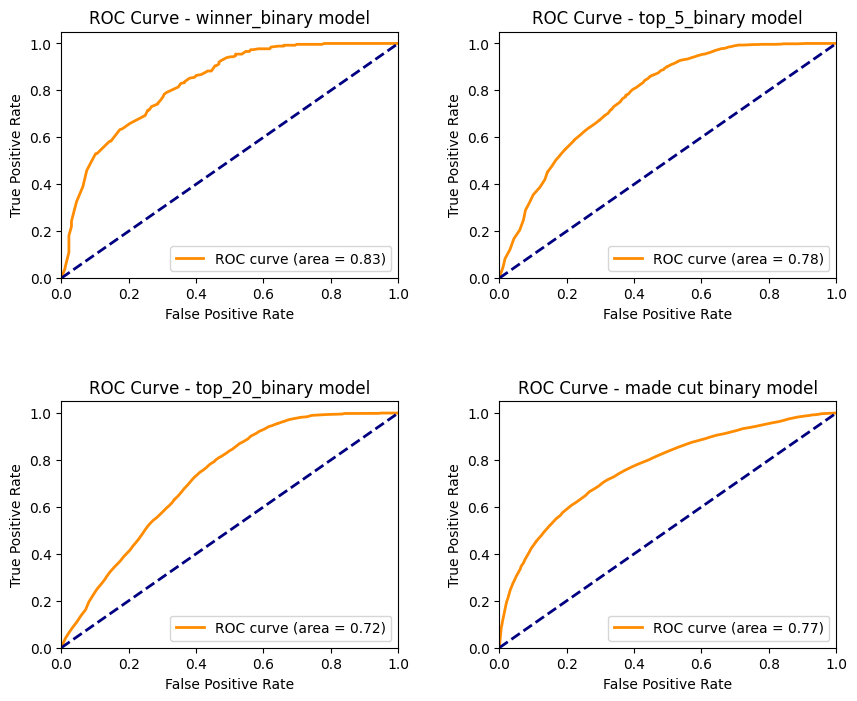

In [ ]:
# Create a figure with subplots

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
plt.subplots_adjust(wspace=0.3, hspace=0.5)

# Compute ROC curve and ROC area for winner_binary model
y_pred_proba = rf.predict_proba(X_test_win)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_win, y_pred_proba)
roc_auc = roc_auc_score(y_test_win, y_pred_proba)

# Plot ROC curve for winner_binary model
axs[0, 0].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axs[0, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[0, 0].set_xlim([0.0, 1.0])
axs[0, 0].set_ylim([0.0, 1.05])
axs[0, 0].set_xlabel('False Positive Rate')
axs[0, 0].set_ylabel('True Positive Rate')
axs[0, 0].set_title('ROC Curve - winner_binary model')
axs[0, 0].legend(loc="lower right")

# Compute ROC curve and ROC area for top_5_binary model
y_pred_proba = rf.predict_proba(X_test_top5)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_top5, y_pred_proba)
roc_auc = roc_auc_score(y_test_top5, y_pred_proba)

# Plot ROC curve for top_5_binary model
axs[0, 1].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axs[0, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[0, 1].set_xlim([0.0, 1.0])
axs[0, 1].set_ylim([0.0, 1.05])
axs[0, 1].set_xlabel('False Positive Rate')
axs[0, 1].set_ylabel('True Positive Rate')
axs[0, 1].set_title('ROC Curve - top_5_binary model')
axs[0, 1].legend(loc="lower right")

# Compute ROC curve and ROC area for top_20_binary model
y_pred_proba = rf.predict_proba(X_test_top20)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_top20, y_pred_proba)
roc_auc = roc_auc_score(y_test_top20, y_pred_proba)

# Plot ROC curve for top_20_binary model
axs[1, 0].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axs[1, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[1, 0].set_xlim([0.0, 1.0])
axs[1, 0].set_ylim([0.0, 1.05])
axs[1, 0].set_xlabel('False Positive Rate')
axs[1, 0].set_ylabel('True Positive Rate')
axs[1, 0].set_title('ROC Curve - top_20_binary model')
axs[1, 0].legend(loc="lower right")

# Compute ROC curve and ROC area for made_cut_binary model
y_pred_proba = rf.predict_proba(X_test_cut)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_cut, y_pred_proba)
roc_auc = roc_auc_score(y_test_cut, y_pred_proba)

# Plot ROC curve for made_cut_binary model
axs[1, 1].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axs[1, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[1, 1].set_xlim([0.0, 1.0])
axs[1, 1].set_ylim([0.0, 1.05])
axs[1, 1].set_xlabel('False Positive Rate')
axs[1, 1].set_ylabel('True Positive Rate')
axs[1, 1].set_title('ROC Curve - made cut binary model')
axs[1, 1].legend(loc="lower right")


# Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# create the model
gb = GradientBoostingClassifier(random_state=42)

# fit and evaluate the model for winner_binary
gb.fit(X_train_win, y_train_win)
y_pred_train = gb.predict(X_train_win)
y_pred_test = gb.predict(X_test_win)

print("Winner Binary:")
print("Training Accuracy:", accuracy_score(y_train_win, y_pred_train))
print("Testing Accuracy:", accuracy_score(y_test_win, y_pred_test))

# classification report for accuracy of predictions for winner
gb_pred = gb.predict(X_test_win)
gb_report = classification_report(y_test_win, gb_pred, zero_division=0)
print(gb_report)

# fit and evaluate the model for top_5_binary
gb.fit(X_train_top5, y_train_top5)
y_pred_train = gb.predict(X_train_top5)
y_pred_test = gb.predict(X_test_top5)

print("\nTop 5 Binary:")
print("Training Accuracy:", accuracy_score(y_train_top5, y_pred_train))
print("Testing Accuracy:", accuracy_score(y_test_top5, y_pred_test))

# classification report for accuracy of predictions for top 5
gb_pred = gb.predict(X_test_top5)
gb_report = classification_report(y_test_top5, gb_pred, zero_division=0)
print(gb_report)

# fit and evaluate the model for top_20_binary
gb.fit(X_train_top20, y_train_top20)
y_pred_train = gb.predict(X_train_top20)
y_pred_test = gb.predict(X_test_top20)

print("\nTop 20 Binary:")
print("Training Accuracy:", accuracy_score(y_train_top20, y_pred_train))
print("Testing Accuracy:", accuracy_score(y_test_top20, y_pred_test))

# classification report for accuracy of predictions for top 20
gb_pred = gb.predict(X_test_top20)
gb_report = classification_report(y_test_top20, gb_pred, zero_division=0)
print(gb_report)

# fit and evaluate the model for made_cut_binary
gb.fit(X_train_cut, y_train_cut)
y_pred_train = gb.predict(X_train_cut)
y_pred_test = gb.predict(X_test_cut)

print("\nMade Cut Binary:")
print("Training Accuracy:", accuracy_score(y_train_cut, y_pred_train))
print("Testing Accuracy:", accuracy_score(y_test_cut, y_pred_test))

# classification report for accuracy of predictions for cut
gb_pred = gb.predict(X_test_cut)
gb_report = classification_report(y_test_cut, gb_pred, zero_division=0)
print(gb_report)


Winner Binary:
Training Accuracy: 0.8580697485806975
Testing Accuracy: 0.7655954631379962
              precision    recall  f1-score   support

           0       0.79      0.72      0.75       265
           1       0.74      0.81      0.78       264

    accuracy                           0.77       529
   macro avg       0.77      0.77      0.77       529
weighted avg       0.77      0.77      0.77       529


Top 5 Binary:
Training Accuracy: 0.7483602623580227
Testing Accuracy: 0.7241508025382606
              precision    recall  f1-score   support

           0       0.74      0.68      0.71      1340
           1       0.71      0.76      0.73      1339

    accuracy                           0.72      2679
   macro avg       0.73      0.72      0.72      2679
weighted avg       0.73      0.72      0.72      2679


Top 20 Binary:
Training Accuracy: 0.6832703538302989
Testing Accuracy: 0.6575060116798351
              precision    recall  f1-score   support

           0       0

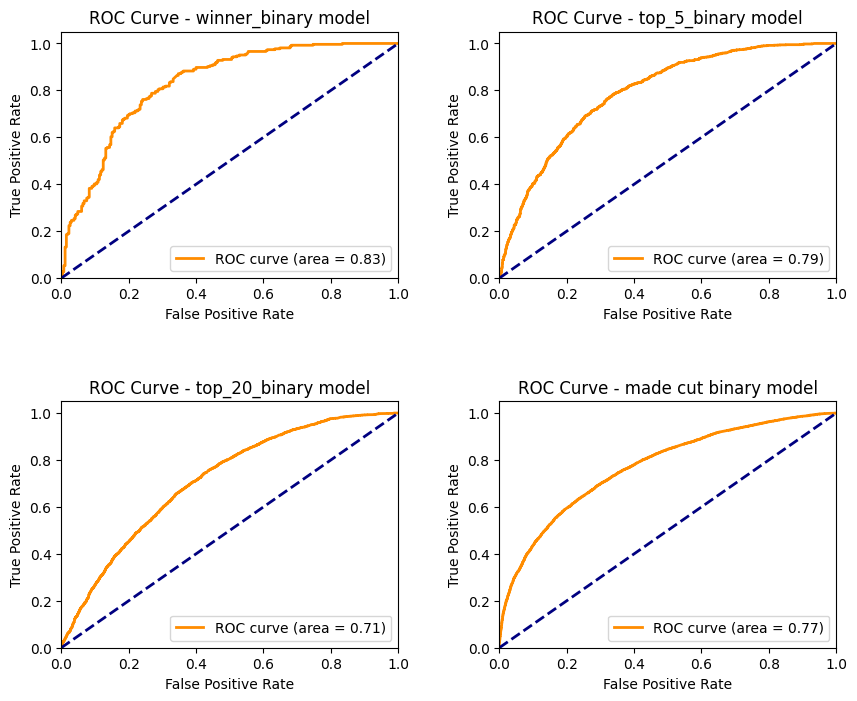

In [ ]:
# Create a figure with subplots

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
plt.subplots_adjust(wspace=0.3, hspace=0.5)

# Compute ROC curve and ROC area for winner_binary model
y_pred_proba = gb.predict_proba(X_test_win)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_win, y_pred_proba)
roc_auc = roc_auc_score(y_test_win, y_pred_proba)

# Plot ROC curve for winner_binary model
axs[0, 0].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axs[0, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[0, 0].set_xlim([0.0, 1.0])
axs[0, 0].set_ylim([0.0, 1.05])
axs[0, 0].set_xlabel('False Positive Rate')
axs[0, 0].set_ylabel('True Positive Rate')
axs[0, 0].set_title('ROC Curve - winner_binary model')
axs[0, 0].legend(loc="lower right")

# Compute ROC curve and ROC area for top_5_binary model
y_pred_proba = gb.predict_proba(X_test_top5)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_top5, y_pred_proba)
roc_auc = roc_auc_score(y_test_top5, y_pred_proba)

# Plot ROC curve for top_5_binary model
axs[0, 1].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axs[0, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[0, 1].set_xlim([0.0, 1.0])
axs[0, 1].set_ylim([0.0, 1.05])
axs[0, 1].set_xlabel('False Positive Rate')
axs[0, 1].set_ylabel('True Positive Rate')
axs[0, 1].set_title('ROC Curve - top_5_binary model')
axs[0, 1].legend(loc="lower right")

# Compute ROC curve and ROC area for top_20_binary model
y_pred_proba = gb.predict_proba(X_test_top20)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_top20, y_pred_proba)
roc_auc = roc_auc_score(y_test_top20, y_pred_proba)

# Plot ROC curve for top_20_binary model
axs[1, 0].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axs[1, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[1, 0].set_xlim([0.0, 1.0])
axs[1, 0].set_ylim([0.0, 1.05])
axs[1, 0].set_xlabel('False Positive Rate')
axs[1, 0].set_ylabel('True Positive Rate')
axs[1, 0].set_title('ROC Curve - top_20_binary model')
axs[1, 0].legend(loc="lower right")

# Compute ROC curve and ROC area for made_cut_binary model
y_pred_proba = gb.predict_proba(X_test_cut)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_cut, y_pred_proba)
roc_auc = roc_auc_score(y_test_cut, y_pred_proba)

# Plot ROC curve for made_cut_binary model
axs[1, 1].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axs[1, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[1, 1].set_xlim([0.0, 1.0])
axs[1, 1].set_ylim([0.0, 1.05])
axs[1, 1].set_xlabel('False Positive Rate')
axs[1, 1].set_ylabel('True Positive Rate')
axs[1, 1].set_title('ROC Curve - made cut binary model')
axs[1, 1].legend(loc="lower right")


# XG Boost

In [ ]:
from xgboost import XGBClassifier

# create the model
xgb = XGBClassifier(random_state=42)

# fit and evaluate the model for winner_binary
xgb.fit(X_train_win, y_train_win)
y_pred_train = xgb.predict(X_train_win)
y_pred_test = xgb.predict(X_test_win)

print("Winner Binary:")
print("Training Accuracy:", accuracy_score(y_train_win, y_pred_train))
print("Testing Accuracy:", accuracy_score(y_test_win, y_pred_test))

# classification report for accuracy of predictions for winner
xgb_pred = xgb.predict(X_test_win)
xgb_report = classification_report(y_test_win, xgb_pred, zero_division=0)
print(xgb_report)

# fit and evaluate the model for top_5_binary
xgb.fit(X_train_top5, y_train_top5)
y_pred_train = xgb.predict(X_train_top5)
y_pred_test = xgb.predict(X_test_top5)

print("\nTop 5 Binary:")
print("Training Accuracy:", accuracy_score(y_train_top5, y_pred_train))
print("Testing Accuracy:", accuracy_score(y_test_top5, y_pred_test))

# classification report for accuracy of predictions for top 5
xgb_pred = xgb.predict(X_test_top5)
xgb_report = classification_report(y_test_top5, xgb_pred, zero_division=0)
print(xgb_report)

# fit and evaluate the model for top_20_binary
xgb.fit(X_train_top20, y_train_top20)
y_pred_train = xgb.predict(X_train_top20)
y_pred_test = xgb.predict(X_test_top20)

print("\nTop 20 Binary:")
print("Training Accuracy:", accuracy_score(y_train_top20, y_pred_train))
print("Testing Accuracy:", accuracy_score(y_test_top20, y_pred_test))

# classification report for accuracy of predictions for top 20
xgb_pred = xgb.predict(X_test_top20)
xgb_report = classification_report(y_test_top20, xgb_pred, zero_division=0)
print(xgb_report)

# fit and evaluate the model for made_cut_binary
xgb.fit(X_train_cut, y_train_cut)
y_pred_train = xgb.predict(X_train_cut)
y_pred_test = xgb.predict(X_test_cut)

print("\nMade Cut Binary:")
print("Training Accuracy:", accuracy_score(y_train_cut, y_pred_train))
print("Testing Accuracy:", accuracy_score(y_test_cut, y_pred_test))

# classification report for accuracy of predictions for cut
xgb_pred = xgb.predict(X_test_cut)
xgb_report = classification_report(y_test_cut, xgb_pred, zero_division=0)
print(xgb_report)


Winner Binary:
Training Accuracy: 0.9927007299270073
Testing Accuracy: 0.7296786389413988
              precision    recall  f1-score   support

           0       0.76      0.68      0.72       265
           1       0.71      0.78      0.74       264

    accuracy                           0.73       529
   macro avg       0.73      0.73      0.73       529
weighted avg       0.73      0.73      0.73       529


Top 5 Binary:
Training Accuracy: 0.9374500079987202
Testing Accuracy: 0.706233669279582
              precision    recall  f1-score   support

           0       0.72      0.67      0.69      1340
           1       0.69      0.74      0.72      1339

    accuracy                           0.71      2679
   macro avg       0.71      0.71      0.71      2679
weighted avg       0.71      0.71      0.71      2679


Top 20 Binary:
Training Accuracy: 0.8046817490307699
Testing Accuracy: 0.6442230619489293
              precision    recall  f1-score   support

           0       0.

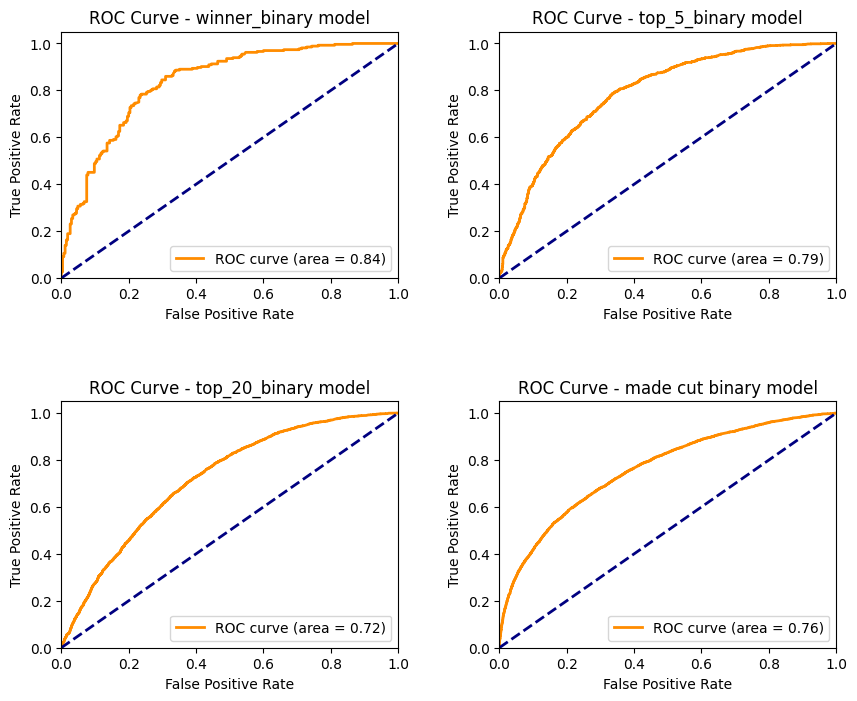

In [ ]:
# Create a figure with subplots

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
plt.subplots_adjust(wspace=0.3, hspace=0.5)

# Compute ROC curve and ROC area for winner_binary model
y_pred_proba = xgb.predict_proba(X_test_win)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_win, y_pred_proba)
roc_auc = roc_auc_score(y_test_win, y_pred_proba)

# Plot ROC curve for winner_binary model
axs[0, 0].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axs[0, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[0, 0].set_xlim([0.0, 1.0])
axs[0, 0].set_ylim([0.0, 1.05])
axs[0, 0].set_xlabel('False Positive Rate')
axs[0, 0].set_ylabel('True Positive Rate')
axs[0, 0].set_title('ROC Curve - winner_binary model')
axs[0, 0].legend(loc="lower right")

# Compute ROC curve and ROC area for top_5_binary model
y_pred_proba = xgb.predict_proba(X_test_top5)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_top5, y_pred_proba)
roc_auc = roc_auc_score(y_test_top5, y_pred_proba)

# Plot ROC curve for top_5_binary model
axs[0, 1].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axs[0, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[0, 1].set_xlim([0.0, 1.0])
axs[0, 1].set_ylim([0.0, 1.05])
axs[0, 1].set_xlabel('False Positive Rate')
axs[0, 1].set_ylabel('True Positive Rate')
axs[0, 1].set_title('ROC Curve - top_5_binary model')
axs[0, 1].legend(loc="lower right")

# Compute ROC curve and ROC area for top_20_binary model
y_pred_proba = xgb.predict_proba(X_test_top20)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_top20, y_pred_proba)
roc_auc = roc_auc_score(y_test_top20, y_pred_proba)

# Plot ROC curve for top_20_binary model
axs[1, 0].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axs[1, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[1, 0].set_xlim([0.0, 1.0])
axs[1, 0].set_ylim([0.0, 1.05])
axs[1, 0].set_xlabel('False Positive Rate')
axs[1, 0].set_ylabel('True Positive Rate')
axs[1, 0].set_title('ROC Curve - top_20_binary model')
axs[1, 0].legend(loc="lower right")

# Compute ROC curve and ROC area for made_cut_binary model
y_pred_proba = xgb.predict_proba(X_test_cut)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_cut, y_pred_proba)
roc_auc = roc_auc_score(y_test_cut, y_pred_proba)

# Plot ROC curve for made_cut_binary model
axs[1, 1].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axs[1, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[1, 1].set_xlim([0.0, 1.0])
axs[1, 1].set_ylim([0.0, 1.05])
axs[1, 1].set_xlabel('False Positive Rate')
axs[1, 1].set_ylabel('True Positive Rate')
axs[1, 1].set_title('ROC Curve - made cut binary model')
axs[1, 1].legend(loc="lower right")


# OverSample

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

# Resample each class separately
oversampler = RandomOverSampler(random_state=42)

X_resampled_win, y_resampled_win = oversampler.fit_resample(X, y_win)
X_resampled_top5, y_resampled_top5 = oversampler.fit_resample(X, y_top5)
X_resampled_top20, y_resampled_top20 = oversampler.fit_resample(X, y_top20)
X_resampled_cut, y_resampled_cut = oversampler.fit_resample(X, y_cut)

# Split the resampled data into training and test sets, stratifying on the target variables
X_train_win, X_test_win, y_train_win, y_test_win = train_test_split(X_resampled_win, y_resampled_win, test_size=0.3, random_state=42, stratify=y_resampled_win)
X_train_top5, X_test_top5, y_train_top5, y_test_top5 = train_test_split(X_resampled_top5, y_resampled_top5, test_size=0.3, random_state=42, stratify=y_resampled_top5)
X_train_top20, X_test_top20, y_train_top20, y_test_top20 = train_test_split(X_resampled_top20, y_resampled_top20, test_size=0.3, random_state=42, stratify=y_resampled_top20)
X_train_cut, X_test_cut, y_train_cut, y_test_cut = train_test_split(X_resampled_cut, y_resampled_cut, test_size=0.3, random_state=42, stratify=y_resampled_cut)


In [ ]:
# Print value counts for target variables in the training set
print("Training Set:")
print("Winner Binary:\n", y_train_win.value_counts())
print("Top 5 Binary:\n", y_train_top5.value_counts())
print("Top 20 Binary:\n", y_train_top20.value_counts())
print("Made Cut Binary:\n", y_train_cut.value_counts())

# Print value counts for target variables in the test set
print("\nTest Set:")
print("Winner Binary:\n", y_test_win.value_counts())
print("Top 5 Binary:\n", y_test_top5.value_counts())
print("Top 20 Binary:\n", y_test_top20.value_counts())
print("Made Cut Binary:\n", y_test_cut.value_counts())


Training Set:
Winner Binary:
 1    61580
0    61579
Name: winner_binary, dtype: int64
Top 5 Binary:
 1    59071
0    59070
Name: top_5_binary, dtype: int64
Top 20 Binary:
 1    52008
0    52007
Name: top_20_binary, dtype: int64
Made Cut Binary:
 0    43687
1    43687
Name: made_cut_binary, dtype: int64

Test Set:
Winner Binary:
 0    26392
1    26391
Name: winner_binary, dtype: int64
Top 5 Binary:
 0    25317
1    25316
Name: top_5_binary, dtype: int64
Top 20 Binary:
 0    22290
1    22289
Name: top_20_binary, dtype: int64
Made Cut Binary:
 1    18723
0    18723
Name: made_cut_binary, dtype: int64


# Logisitic regression- Oversampling

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# create the model
lr = LogisticRegression()

# fit and evaluate the model for winner_binary
lr.fit(X_train_win, y_train_win)
y_pred_train = lr.predict(X_train_win)
y_pred_test = lr.predict(X_test_win)

print("Winner Binary:")
print("Training Accuracy:", accuracy_score(y_train_win, y_pred_train))
print("Testing Accuracy:", accuracy_score(y_test_win, y_pred_test))

# classification report for accuracy of predictions for winner
lr_pred = lr.predict(X_test_win)
lr_report = classification_report(y_test_win, lr_pred, zero_division=0)
print(lr_report)

# fit and evaluate the model for top_5_binary
lr.fit(X_train_top5, y_train_top5)
y_pred_train = lr.predict(X_train_top5)
y_pred_test = lr.predict(X_test_top5)

print("\nTop 5 Binary:")
print("Training Accuracy:", accuracy_score(y_train_top5, y_pred_train))
print("Testing Accuracy:", accuracy_score(y_test_top5, y_pred_test))

# classification report for accuracy of predictions for top 5
lr_pred = lr.predict(X_test_top5)
lr_report = classification_report(y_test_top5, lr_pred, zero_division=0)
print(lr_report)

# fit and evaluate the model for top_20_binary
lr.fit(X_train_top20, y_train_top20)
y_pred_train = lr.predict(X_train_top20)
y_pred_test = lr.predict(X_test_top20)

print("\nTop 20 Binary:")
print("Training Accuracy:", accuracy_score(y_train_top20, y_pred_train))
print("Testing Accuracy:", accuracy_score(y_test_top20, y_pred_test))

# classification report for accuracy of predictions for top 20
lr_pred = lr.predict(X_test_top20)
lr_report = classification_report(y_test_top20, lr_pred, zero_division=0)
print(lr_report)

# fit and evaluate the model for made_cut_binary
lr.fit(X_train_cut, y_train_cut)
y_pred_train = lr.predict(X_train_cut)
y_pred_test = lr.predict(X_test_cut)

print("\nMade Cut Binary:")
print("Training Accuracy:", accuracy_score(y_train_cut, y_pred_train))
print("Testing Accuracy:", accuracy_score(y_test_cut, y_pred_test))

#classification report for accuracy of predictions for cut
lr_pred = lr.predict(X_test_cut)
lr_report = classification_report(y_test_cut, lr_pred, zero_division=0)
print(lr_report)


Winner Binary:
Training Accuracy: 0.7765165355353648
Testing Accuracy: 0.7779967034840763
              precision    recall  f1-score   support

           0       0.78      0.77      0.78     26392
           1       0.77      0.79      0.78     26391

    accuracy                           0.78     52783
   macro avg       0.78      0.78      0.78     52783
weighted avg       0.78      0.78      0.78     52783


Top 5 Binary:
Training Accuracy: 0.7215699884036871
Testing Accuracy: 0.722295735982462
              precision    recall  f1-score   support

           0       0.73      0.71      0.72     25317
           1       0.72      0.73      0.73     25316

    accuracy                           0.72     50633
   macro avg       0.72      0.72      0.72     50633
weighted avg       0.72      0.72      0.72     50633


Top 20 Binary:
Training Accuracy: 0.6664231120511465
Testing Accuracy: 0.6658516341775276
              precision    recall  f1-score   support

           0       0.

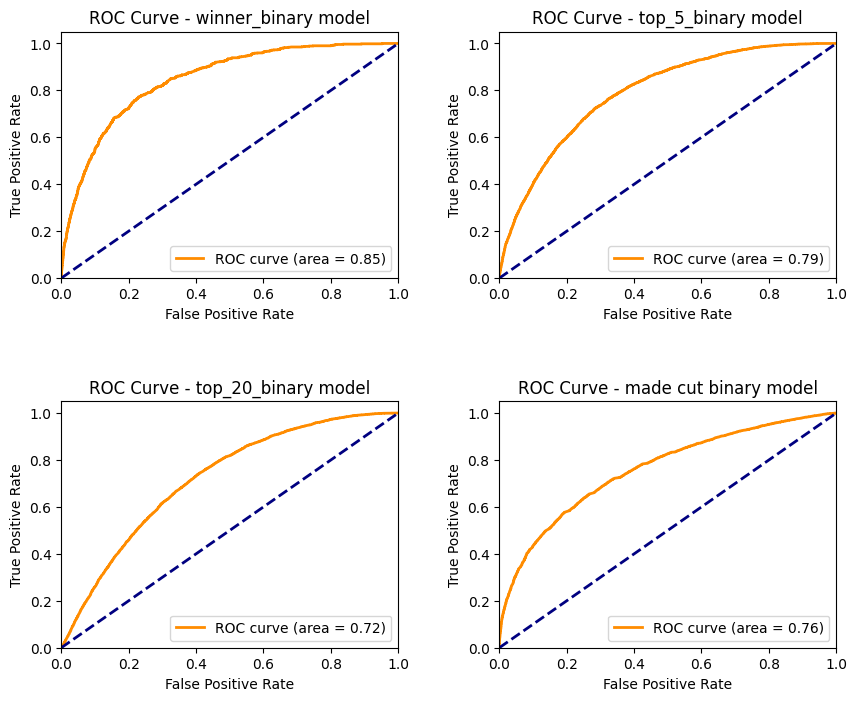

In [ ]:
# Create a figure with subplots

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
plt.subplots_adjust(wspace=0.3, hspace=0.5)

# Compute ROC curve and ROC area for winner_binary model
y_pred_proba = lr.predict_proba(X_test_win)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_win, y_pred_proba)
roc_auc = roc_auc_score(y_test_win, y_pred_proba)

# Plot ROC curve for winner_binary model
axs[0, 0].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axs[0, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[0, 0].set_xlim([0.0, 1.0])
axs[0, 0].set_ylim([0.0, 1.05])
axs[0, 0].set_xlabel('False Positive Rate')
axs[0, 0].set_ylabel('True Positive Rate')
axs[0, 0].set_title('ROC Curve - winner_binary model')
axs[0, 0].legend(loc="lower right")

# Compute ROC curve and ROC area for top_5_binary model
y_pred_proba = lr.predict_proba(X_test_top5)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_top5, y_pred_proba)
roc_auc = roc_auc_score(y_test_top5, y_pred_proba)

# Plot ROC curve for top_5_binary model
axs[0, 1].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axs[0, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[0, 1].set_xlim([0.0, 1.0])
axs[0, 1].set_ylim([0.0, 1.05])
axs[0, 1].set_xlabel('False Positive Rate')
axs[0, 1].set_ylabel('True Positive Rate')
axs[0, 1].set_title('ROC Curve - top_5_binary model')
axs[0, 1].legend(loc="lower right")

# Compute ROC curve and ROC area for top_20_binary model
y_pred_proba = lr.predict_proba(X_test_top20)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_top20, y_pred_proba)
roc_auc = roc_auc_score(y_test_top20, y_pred_proba)

# Plot ROC curve for top_20_binary model
axs[1, 0].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axs[1, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[1, 0].set_xlim([0.0, 1.0])
axs[1, 0].set_ylim([0.0, 1.05])
axs[1, 0].set_xlabel('False Positive Rate')
axs[1, 0].set_ylabel('True Positive Rate')
axs[1, 0].set_title('ROC Curve - top_20_binary model')
axs[1, 0].legend(loc="lower right")

# Compute ROC curve and ROC area for made_cut_binary model
y_pred_proba = lr.predict_proba(X_test_cut)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_cut, y_pred_proba)
roc_auc = roc_auc_score(y_test_cut, y_pred_proba)

# Plot ROC curve for made_cut_binary model
axs[1, 1].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axs[1, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[1, 1].set_xlim([0.0, 1.0])
axs[1, 1].set_ylim([0.0, 1.05])
axs[1, 1].set_xlabel('False Positive Rate')
axs[1, 1].set_ylabel('True Positive Rate')
axs[1, 1].set_title('ROC Curve - made cut binary model')
axs[1, 1].legend(loc="lower right")


# Naive bayes- Oversampling

In [ ]:
# create the model
nb = GaussianNB()

# fit and evaluate the model for winner_binary
nb.fit(X_train_win, y_train_win)
y_pred_train = nb.predict(X_train_win)
y_pred_test = nb.predict(X_test_win)

print("Winner Binary:")
print("Training Accuracy:", accuracy_score(y_train_win, y_pred_train))
print("Testing Accuracy:", accuracy_score(y_test_win, y_pred_test))

# classification report for accuracy of predictions for winner
nb_pred = nb.predict(X_test_win)
nb_report = classification_report(y_test_win, nb_pred, zero_division=0)
print(nb_report)

# fit and evaluate the model for top_5_binary
nb.fit(X_train_top5, y_train_top5)
y_pred_train = nb.predict(X_train_top5)
y_pred_test = nb.predict(X_test_top5)

print("\nTop 5 Binary:")
print("Training Accuracy:", accuracy_score(y_train_top5, y_pred_train))
print("Testing Accuracy:", accuracy_score(y_test_top5, y_pred_test))

# classification report for accuracy of predictions for top 5
nb_pred = nb.predict(X_test_top5)
nb_report = classification_report(y_test_top5, nb_pred, zero_division=0)
print(nb_report)

# fit and evaluate the model for top_20_binary
nb.fit(X_train_top20, y_train_top20)
y_pred_train = nb.predict(X_train_top20)
y_pred_test = nb.predict(X_test_top20)

print("\nTop 20 Binary:")
print("Training Accuracy:", accuracy_score(y_train_top20, y_pred_train))
print("Testing Accuracy:", accuracy_score(y_test_top20, y_pred_test))

# classification report for accuracy of predictions for top 20
nb_pred = nb.predict(X_test_top20)
nb_report = classification_report(y_test_top20, nb_pred, zero_division=0)
print(nb_report)

# fit and evaluate the model for made_cut_binary
nb.fit(X_train_cut, y_train_cut)
y_pred_train = nb.predict(X_train_cut)
y_pred_test = nb.predict(X_test_cut)

print("\nMade Cut Binary:")
print("Training Accuracy:", accuracy_score(y_train_cut, y_pred_train))
print("Testing Accuracy:", accuracy_score(y_test_cut, y_pred_test))

#classification report for accuracy of predictions for cut
nb_pred = nb.predict(X_test_cut)
nb_report = classification_report(y_test_cut, nb_pred, zero_division=0)
print(nb_report)




Winner Binary:
Training Accuracy: 0.750704374020575
Testing Accuracy: 0.7502415550461323
              precision    recall  f1-score   support

           0       0.77      0.72      0.74     26392
           1       0.74      0.78      0.76     26391

    accuracy                           0.75     52783
   macro avg       0.75      0.75      0.75     52783
weighted avg       0.75      0.75      0.75     52783


Top 5 Binary:
Training Accuracy: 0.705216647903776
Testing Accuracy: 0.7054292654987854
              precision    recall  f1-score   support

           0       0.73      0.65      0.69     25317
           1       0.69      0.76      0.72     25316

    accuracy                           0.71     50633
   macro avg       0.71      0.71      0.70     50633
weighted avg       0.71      0.71      0.70     50633


Top 20 Binary:
Training Accuracy: 0.6514156612027111
Testing Accuracy: 0.6515175306758788
              precision    recall  f1-score   support

           0       0.6

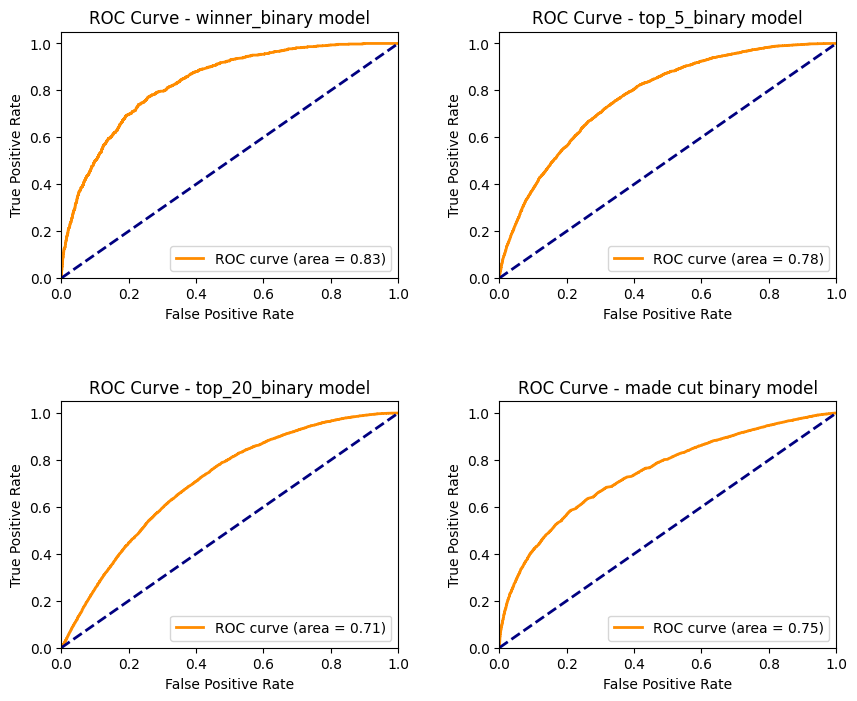

In [ ]:
# Create a figure with subplots

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
plt.subplots_adjust(wspace=0.3, hspace=0.5)

# Compute ROC curve and ROC area for winner_binary model
y_pred_proba = nb.predict_proba(X_test_win)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_win, y_pred_proba)
roc_auc = roc_auc_score(y_test_win, y_pred_proba)

# Plot ROC curve for winner_binary model
axs[0, 0].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axs[0, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[0, 0].set_xlim([0.0, 1.0])
axs[0, 0].set_ylim([0.0, 1.05])
axs[0, 0].set_xlabel('False Positive Rate')
axs[0, 0].set_ylabel('True Positive Rate')
axs[0, 0].set_title('ROC Curve - winner_binary model')
axs[0, 0].legend(loc="lower right")

# Compute ROC curve and ROC area for top_5_binary model
y_pred_proba = nb.predict_proba(X_test_top5)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_top5, y_pred_proba)
roc_auc = roc_auc_score(y_test_top5, y_pred_proba)

# Plot ROC curve for top_5_binary model
axs[0, 1].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axs[0, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[0, 1].set_xlim([0.0, 1.0])
axs[0, 1].set_ylim([0.0, 1.05])
axs[0, 1].set_xlabel('False Positive Rate')
axs[0, 1].set_ylabel('True Positive Rate')
axs[0, 1].set_title('ROC Curve - top_5_binary model')
axs[0, 1].legend(loc="lower right")

# Compute ROC curve and ROC area for top_20_binary model
y_pred_proba = nb.predict_proba(X_test_top20)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_top20, y_pred_proba)
roc_auc = roc_auc_score(y_test_top20, y_pred_proba)

# Plot ROC curve for top_20_binary model
axs[1, 0].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axs[1, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[1, 0].set_xlim([0.0, 1.0])
axs[1, 0].set_ylim([0.0, 1.05])
axs[1, 0].set_xlabel('False Positive Rate')
axs[1, 0].set_ylabel('True Positive Rate')
axs[1, 0].set_title('ROC Curve - top_20_binary model')
axs[1, 0].legend(loc="lower right")

# Compute ROC curve and ROC area for made_cut_binary model
y_pred_proba = nb.predict_proba(X_test_cut)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_cut, y_pred_proba)
roc_auc = roc_auc_score(y_test_cut, y_pred_proba)

# Plot ROC curve for made_cut_binary model
axs[1, 1].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axs[1, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[1, 1].set_xlim([0.0, 1.0])
axs[1, 1].set_ylim([0.0, 1.05])
axs[1, 1].set_xlabel('False Positive Rate')
axs[1, 1].set_ylabel('True Positive Rate')
axs[1, 1].set_title('ROC Curve - made cut binary model')
axs[1, 1].legend(loc="lower right")


# SVM- Oversampling

# Random Forest- Oversampling

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# create the model
rf = RandomForestClassifier(random_state=42)

# fit and evaluate the model for winner_binary
rf.fit(X_train_win, y_train_win)
y_pred_train = rf.predict(X_train_win)
y_pred_test = rf.predict(X_test_win)

print("Winner Binary:")
print("Training Accuracy:", accuracy_score(y_train_win, y_pred_train))
print("Testing Accuracy:", accuracy_score(y_test_win, y_pred_test))

# classification report for accuracy of predictions for winner
rf_pred = rf.predict(X_test_win)
rf_report = classification_report(y_test_win, rf_pred, zero_division=0)
print(rf_report)

# fit and evaluate the model for top_5_binary
rf.fit(X_train_top5, y_train_top5)
y_pred_train = rf.predict(X_train_top5)
y_pred_test = rf.predict(X_test_top5)

print("\nTop 5 Binary:")
print("Training Accuracy:", accuracy_score(y_train_top5, y_pred_train))
print("Testing Accuracy:", accuracy_score(y_test_top5, y_pred_test))

# classification report for accuracy of predictions for top 5
rf_pred = rf.predict(X_test_top5)
rf_report = classification_report(y_test_top5, rf_pred, zero_division=0)
print(rf_report)

# fit and evaluate the model for top_20_binary
rf.fit(X_train_top20, y_train_top20)
y_pred_train = rf.predict(X_train_top20)
y_pred_test = rf.predict(X_test_top20)

print("\nTop 20 Binary:")
print("Training Accuracy:", accuracy_score(y_train_top20, y_pred_train))
print("Testing Accuracy:", accuracy_score(y_test_top20, y_pred_test))

# classification report for accuracy of predictions for top 20
rf_pred = rf.predict(X_test_top20)
rf_report = classification_report(y_test_top20, rf_pred, zero_division=0)
print(rf_report)

# fit and evaluate the model for made_cut_binary
rf.fit(X_train_cut, y_train_cut)
y_pred_train = rf.predict(X_train_cut)
y_pred_test = rf.predict(X_test_cut)

print("\nMade Cut Binary:")
print("Training Accuracy:", accuracy_score(y_train_cut, y_pred_train))
print("Testing Accuracy:", accuracy_score(y_test_cut, y_pred_test))

# classification report for accuracy of predictions for cut
rf_pred = rf.predict(X_test_cut)
rf_report = classification_report(y_test_cut, rf_pred, zero_division=0)
print(rf_report)


Winner Binary:
Training Accuracy: 0.9901671822603302
Testing Accuracy: 0.9893905234639941
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     26392
           1       0.99      0.99      0.99     26391

    accuracy                           0.99     52783
   macro avg       0.99      0.99      0.99     52783
weighted avg       0.99      0.99      0.99     52783


Top 5 Binary:
Training Accuracy: 0.9859066708424679
Testing Accuracy: 0.9837457784448878
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     25317
           1       0.98      0.98      0.98     25316

    accuracy                           0.98     50633
   macro avg       0.98      0.98      0.98     50633
weighted avg       0.98      0.98      0.98     50633


Top 20 Binary:
Training Accuracy: 0.9837523434120079
Testing Accuracy: 0.9390295879225644
              precision    recall  f1-score   support

           0       0

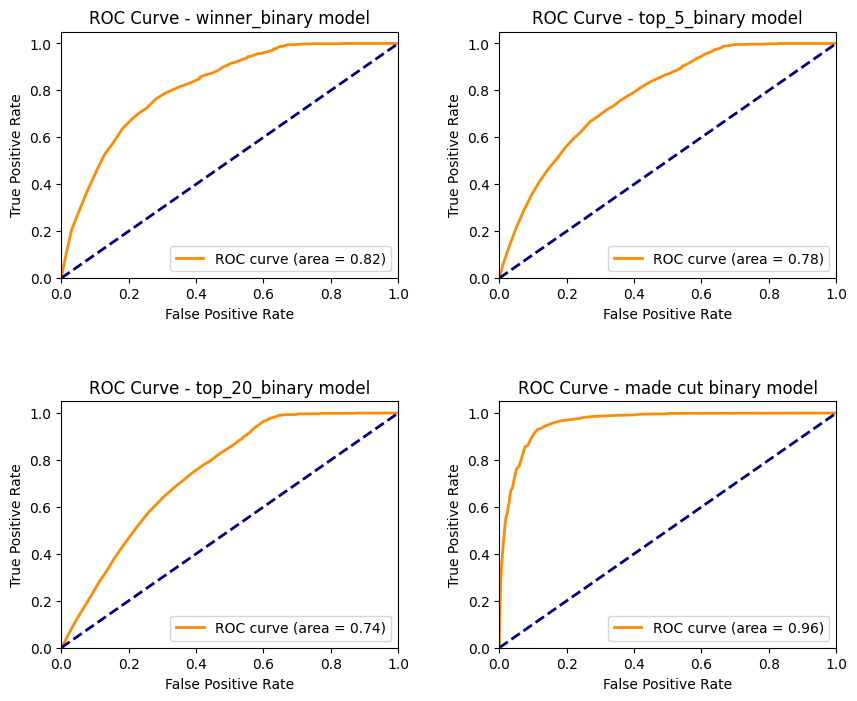

In [ ]:
# Create a figure with subplots

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
plt.subplots_adjust(wspace=0.3, hspace=0.5)

# Compute ROC curve and ROC area for winner_binary model
y_pred_proba = rf.predict_proba(X_test_win)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_win, y_pred_proba)
roc_auc = roc_auc_score(y_test_win, y_pred_proba)

# Plot ROC curve for winner_binary model
axs[0, 0].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axs[0, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[0, 0].set_xlim([0.0, 1.0])
axs[0, 0].set_ylim([0.0, 1.05])
axs[0, 0].set_xlabel('False Positive Rate')
axs[0, 0].set_ylabel('True Positive Rate')
axs[0, 0].set_title('ROC Curve - winner_binary model')
axs[0, 0].legend(loc="lower right")

# Compute ROC curve and ROC area for top_5_binary model
y_pred_proba = rf.predict_proba(X_test_top5)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_top5, y_pred_proba)
roc_auc = roc_auc_score(y_test_top5, y_pred_proba)

# Plot ROC curve for top_5_binary model
axs[0, 1].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axs[0, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[0, 1].set_xlim([0.0, 1.0])
axs[0, 1].set_ylim([0.0, 1.05])
axs[0, 1].set_xlabel('False Positive Rate')
axs[0, 1].set_ylabel('True Positive Rate')
axs[0, 1].set_title('ROC Curve - top_5_binary model')
axs[0, 1].legend(loc="lower right")

# Compute ROC curve and ROC area for top_20_binary model
y_pred_proba = rf.predict_proba(X_test_top20)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_top20, y_pred_proba)
roc_auc = roc_auc_score(y_test_top20, y_pred_proba)

# Plot ROC curve for top_20_binary model
axs[1, 0].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axs[1, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[1, 0].set_xlim([0.0, 1.0])
axs[1, 0].set_ylim([0.0, 1.05])
axs[1, 0].set_xlabel('False Positive Rate')
axs[1, 0].set_ylabel('True Positive Rate')
axs[1, 0].set_title('ROC Curve - top_20_binary model')
axs[1, 0].legend(loc="lower right")

# Compute ROC curve and ROC area for made_cut_binary model
y_pred_proba = rf.predict_proba(X_test_cut)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_cut, y_pred_proba)
roc_auc = roc_auc_score(y_test_cut, y_pred_proba)

# Plot ROC curve for made_cut_binary model
axs[1, 1].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axs[1, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[1, 1].set_xlim([0.0, 1.0])
axs[1, 1].set_ylim([0.0, 1.05])
axs[1, 1].set_xlabel('False Positive Rate')
axs[1, 1].set_ylabel('True Positive Rate')
axs[1, 1].set_title('ROC Curve - made cut binary model')
axs[1, 1].legend(loc="lower right")


# Gradient Boosting Classifiers- Oversampling

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# create the model
gb = GradientBoostingClassifier(random_state=42)

# fit and evaluate the model for winner_binary
gb.fit(X_train_win, y_train_win)
y_pred_train = gb.predict(X_train_win)
y_pred_test = gb.predict(X_test_win)

print("Winner Binary:")
print("Training Accuracy:", accuracy_score(y_train_win, y_pred_train))
print("Testing Accuracy:", accuracy_score(y_test_win, y_pred_test))

# classification report for accuracy of predictions for winner
gb_pred = gb.predict(X_test_win)
gb_report = classification_report(y_test_win, gb_pred, zero_division=0)
print(gb_report)

# fit and evaluate the model for top_5_binary
gb.fit(X_train_top5, y_train_top5)
y_pred_train = gb.predict(X_train_top5)
y_pred_test = gb.predict(X_test_top5)

print("\nTop 5 Binary:")
print("Training Accuracy:", accuracy_score(y_train_top5, y_pred_train))
print("Testing Accuracy:", accuracy_score(y_test_top5, y_pred_test))

# classification report for accuracy of predictions for top 5
gb_pred = gb.predict(X_test_top5)
gb_report = classification_report(y_test_top5, gb_pred, zero_division=0)
print(gb_report)

# fit and evaluate the model for top_20_binary
gb.fit(X_train_top20, y_train_top20)
y_pred_train = gb.predict(X_train_top20)
y_pred_test = gb.predict(X_test_top20)

print("\nTop 20 Binary:")
print("Training Accuracy:", accuracy_score(y_train_top20, y_pred_train))
print("Testing Accuracy:", accuracy_score(y_test_top20, y_pred_test))

# classification report for accuracy of predictions for top 20
gb_pred = gb.predict(X_test_top20)
gb_report = classification_report(y_test_top20, gb_pred, zero_division=0)
print(gb_report)

# fit and evaluate the model for made_cut_binary
gb.fit(X_train_cut, y_train_cut)
y_pred_train = gb.predict(X_train_cut)
y_pred_test = gb.predict(X_test_cut)

print("\nMade Cut Binary:")
print("Training Accuracy:", accuracy_score(y_train_cut, y_pred_train))
print("Testing Accuracy:", accuracy_score(y_test_cut, y_pred_test))

# classification report for accuracy of predictions for cut
gb_pred = gb.predict(X_test_cut)
gb_report = classification_report(y_test_cut, gb_pred, zero_division=0)
print(gb_report)


Winner Binary:
Training Accuracy: 0.8177559090281669
Testing Accuracy: 0.8171570391982267
              precision    recall  f1-score   support

           0       0.84      0.79      0.81     26392
           1       0.80      0.85      0.82     26391

    accuracy                           0.82     52783
   macro avg       0.82      0.82      0.82     52783
weighted avg       0.82      0.82      0.82     52783


Top 5 Binary:
Training Accuracy: 0.7369499157786036
Testing Accuracy: 0.7342642150376237
              precision    recall  f1-score   support

           0       0.75      0.70      0.72     25317
           1       0.72      0.77      0.74     25316

    accuracy                           0.73     50633
   macro avg       0.74      0.73      0.73     50633
weighted avg       0.74      0.73      0.73     50633


Top 20 Binary:
Training Accuracy: 0.6782579435658318
Testing Accuracy: 0.6728953094506382
              precision    recall  f1-score   support

           0       0

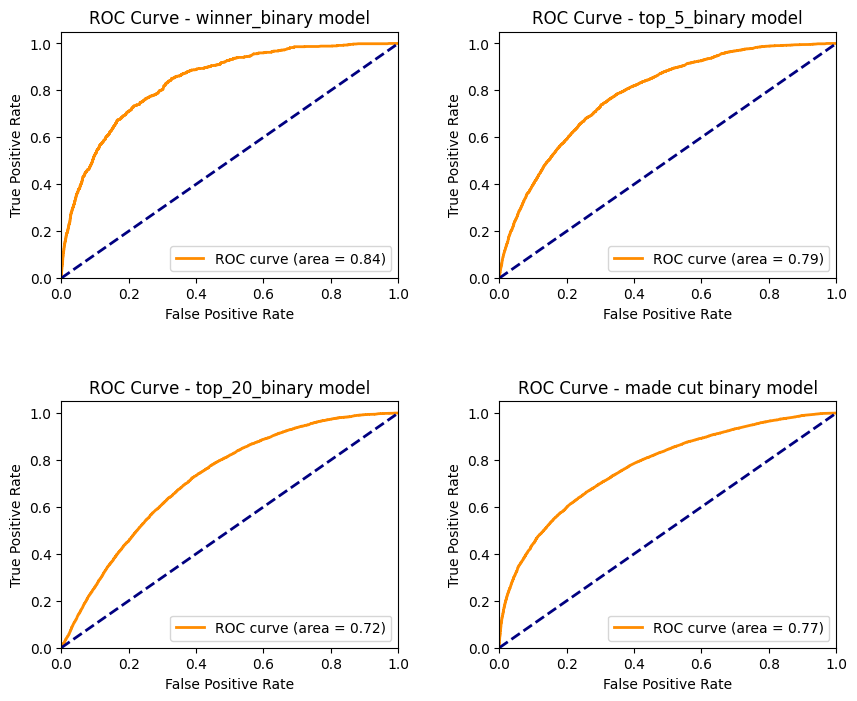

In [ ]:
# Create a figure with subplots

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
plt.subplots_adjust(wspace=0.3, hspace=0.5)

# Compute ROC curve and ROC area for winner_binary model
y_pred_proba = gb.predict_proba(X_test_win)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_win, y_pred_proba)
roc_auc = roc_auc_score(y_test_win, y_pred_proba)

# Plot ROC curve for winner_binary model
axs[0, 0].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axs[0, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[0, 0].set_xlim([0.0, 1.0])
axs[0, 0].set_ylim([0.0, 1.05])
axs[0, 0].set_xlabel('False Positive Rate')
axs[0, 0].set_ylabel('True Positive Rate')
axs[0, 0].set_title('ROC Curve - winner_binary model')
axs[0, 0].legend(loc="lower right")

# Compute ROC curve and ROC area for top_5_binary model
y_pred_proba = gb.predict_proba(X_test_top5)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_top5, y_pred_proba)
roc_auc = roc_auc_score(y_test_top5, y_pred_proba)

# Plot ROC curve for top_5_binary model
axs[0, 1].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axs[0, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[0, 1].set_xlim([0.0, 1.0])
axs[0, 1].set_ylim([0.0, 1.05])
axs[0, 1].set_xlabel('False Positive Rate')
axs[0, 1].set_ylabel('True Positive Rate')
axs[0, 1].set_title('ROC Curve - top_5_binary model')
axs[0, 1].legend(loc="lower right")

# Compute ROC curve and ROC area for top_20_binary model
y_pred_proba = gb.predict_proba(X_test_top20)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_top20, y_pred_proba)
roc_auc = roc_auc_score(y_test_top20, y_pred_proba)

# Plot ROC curve for top_20_binary model
axs[1, 0].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axs[1, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[1, 0].set_xlim([0.0, 1.0])
axs[1, 0].set_ylim([0.0, 1.05])
axs[1, 0].set_xlabel('False Positive Rate')
axs[1, 0].set_ylabel('True Positive Rate')
axs[1, 0].set_title('ROC Curve - top_20_binary model')
axs[1, 0].legend(loc="lower right")

# Compute ROC curve and ROC area for made_cut_binary model
y_pred_proba = gb.predict_proba(X_test_cut)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_cut, y_pred_proba)
roc_auc = roc_auc_score(y_test_cut, y_pred_proba)

# Plot ROC curve for made_cut_binary model
axs[1, 1].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axs[1, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[1, 1].set_xlim([0.0, 1.0])
axs[1, 1].set_ylim([0.0, 1.05])
axs[1, 1].set_xlabel('False Positive Rate')
axs[1, 1].set_ylabel('True Positive Rate')
axs[1, 1].set_title('ROC Curve - made cut binary model')
axs[1, 1].legend(loc="lower right")


## XG Boost- Oversampling

In [ ]:
from xgboost import XGBClassifier

# create the model
xgb = XGBClassifier(random_state=42)

# fit and evaluate the model for winner_binary
xgb.fit(X_train_win, y_train_win)
y_pred_train = xgb.predict(X_train_win)
y_pred_test = xgb.predict(X_test_win)

print("Winner Binary:")
print("Training Accuracy:", accuracy_score(y_train_win, y_pred_train))
print("Testing Accuracy:", accuracy_score(y_test_win, y_pred_test))

# classification report for accuracy of predictions for winner
xgb_pred = xgb.predict(X_test_win)
xgb_report = classification_report(y_test_win, xgb_pred, zero_division=0)
print(xgb_report)

# fit and evaluate the model for top_5_binary
xgb.fit(X_train_top5, y_train_top5)
y_pred_train = xgb.predict(X_train_top5)
y_pred_test = xgb.predict(X_test_top5)

print("\nTop 5 Binary:")
print("Training Accuracy:", accuracy_score(y_train_top5, y_pred_train))
print("Testing Accuracy:", accuracy_score(y_test_top5, y_pred_test))

# classification report for accuracy of predictions for top 5
xgb_pred = xgb.predict(X_test_top5)
xgb_report = classification_report(y_test_top5, xgb_pred, zero_division=0)
print(xgb_report)

# fit and evaluate the model for top_20_binary
xgb.fit(X_train_top20, y_train_top20)
y_pred_train = xgb.predict(X_train_top20)
y_pred_test = xgb.predict(X_test_top20)

print("\nTop 20 Binary:")
print("Training Accuracy:", accuracy_score(y_train_top20, y_pred_train))
print("Testing Accuracy:", accuracy_score(y_test_top20, y_pred_test))

# classification report for accuracy of predictions for top 20
xgb_pred = xgb.predict(X_test_top20)
xgb_report = classification_report(y_test_top20, xgb_pred, zero_division=0)
print(xgb_report)

# fit and evaluate the model for made_cut_binary
xgb.fit(X_train_cut, y_train_cut)
y_pred_train = xgb.predict(X_train_cut)
y_pred_test = xgb.predict(X_test_cut)

print("\nMade Cut Binary:")
print("Training Accuracy:", accuracy_score(y_train_cut, y_pred_train))
print("Testing Accuracy:", accuracy_score(y_test_cut, y_pred_test))

# classification report for accuracy of predictions for cut
xgb_pred = xgb.predict(X_test_cut)
xgb_report = classification_report(y_test_cut, xgb_pred, zero_division=0)
print(xgb_report)


Winner Binary:
Training Accuracy: 0.9753814175171932
Testing Accuracy: 0.9697819373661974
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     26392
           1       0.96      0.98      0.97     26391

    accuracy                           0.97     52783
   macro avg       0.97      0.97      0.97     52783
weighted avg       0.97      0.97      0.97     52783


Top 5 Binary:
Training Accuracy: 0.8648902582507343
Testing Accuracy: 0.8448640214879624
              precision    recall  f1-score   support

           0       0.90      0.78      0.83     25317
           1       0.81      0.91      0.85     25316

    accuracy                           0.84     50633
   macro avg       0.85      0.84      0.84     50633
weighted avg       0.85      0.84      0.84     50633


Top 20 Binary:
Training Accuracy: 0.7655818872278037
Testing Accuracy: 0.7300522667623769
              precision    recall  f1-score   support

           0       0

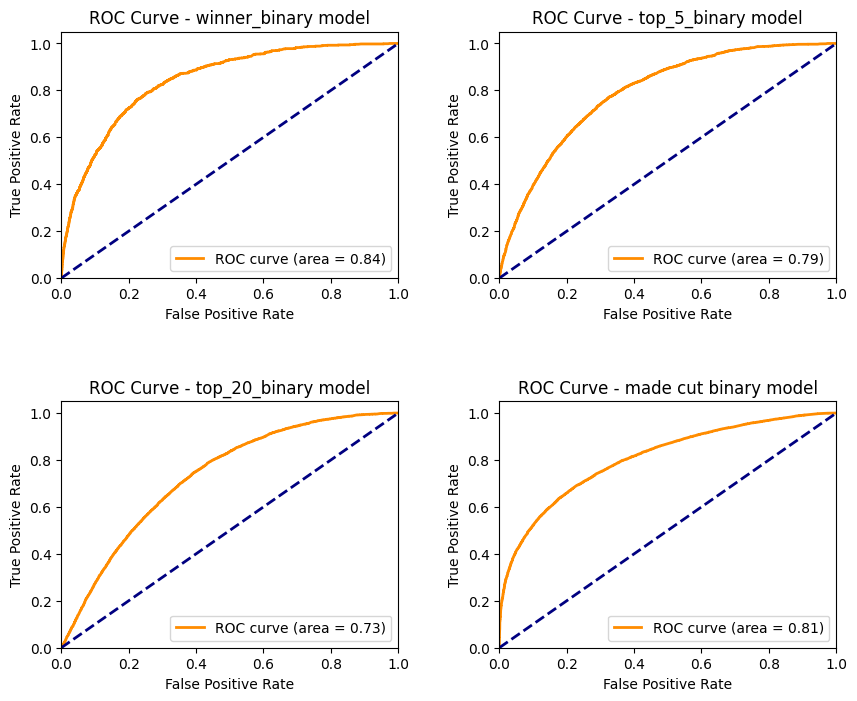

In [ ]:
# Create a figure with subplots

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
plt.subplots_adjust(wspace=0.3, hspace=0.5)

# Compute ROC curve and ROC area for winner_binary model
y_pred_proba = xgb.predict_proba(X_test_win)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_win, y_pred_proba)
roc_auc = roc_auc_score(y_test_win, y_pred_proba)

# Plot ROC curve for winner_binary model
axs[0, 0].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axs[0, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[0, 0].set_xlim([0.0, 1.0])
axs[0, 0].set_ylim([0.0, 1.05])
axs[0, 0].set_xlabel('False Positive Rate')
axs[0, 0].set_ylabel('True Positive Rate')
axs[0, 0].set_title('ROC Curve - winner_binary model')
axs[0, 0].legend(loc="lower right")

# Compute ROC curve and ROC area for top_5_binary model
y_pred_proba = xgb.predict_proba(X_test_top5)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_top5, y_pred_proba)
roc_auc = roc_auc_score(y_test_top5, y_pred_proba)

# Plot ROC curve for top_5_binary model
axs[0, 1].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axs[0, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[0, 1].set_xlim([0.0, 1.0])
axs[0, 1].set_ylim([0.0, 1.05])
axs[0, 1].set_xlabel('False Positive Rate')
axs[0, 1].set_ylabel('True Positive Rate')
axs[0, 1].set_title('ROC Curve - top_5_binary model')
axs[0, 1].legend(loc="lower right")

# Compute ROC curve and ROC area for top_20_binary model
y_pred_proba = xgb.predict_proba(X_test_top20)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_top20, y_pred_proba)
roc_auc = roc_auc_score(y_test_top20, y_pred_proba)

# Plot ROC curve for top_20_binary model
axs[1, 0].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axs[1, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[1, 0].set_xlim([0.0, 1.0])
axs[1, 0].set_ylim([0.0, 1.05])
axs[1, 0].set_xlabel('False Positive Rate')
axs[1, 0].set_ylabel('True Positive Rate')
axs[1, 0].set_title('ROC Curve - top_20_binary model')
axs[1, 0].legend(loc="lower right")

# Compute ROC curve and ROC area for made_cut_binary model
y_pred_proba = xgb.predict_proba(X_test_cut)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_cut, y_pred_proba)
roc_auc = roc_auc_score(y_test_cut, y_pred_proba)

# Plot ROC curve for made_cut_binary model
axs[1, 1].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
axs[1, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[1, 1].set_xlim([0.0, 1.0])
axs[1, 1].set_ylim([0.0, 1.05])
axs[1, 1].set_xlabel('False Positive Rate')
axs[1, 1].set_ylabel('True Positive Rate')
axs[1, 1].set_title('ROC Curve - made cut binary model')
axs[1, 1].legend(loc="lower right")
